# Tasks: EDA(Exploratory Data Analysis):
### 1. Perform Data Exploration.
### 2. Data Cleaning.
### 3. Data Visualization and Manipulation.
### 4. Perform EDA on the file separately.

#### You need to perform EDA (Exploratory Data Analysis) on the available datasets mentioned on the above link.

##### Submission Date: 10th July 10:00 PM IST


# -----------------------------------------------------------------------------------------------------------

## Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Import the data set & Explore it

In [2]:
loan_data = pd.read_csv(r"D:\Master Program\Technocolabs\01_Task_New\prosperLoanData.csv")
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
loan_data.isnull().sum()[loan_data.isnull().sum() >= 1 ]

CreditGrade                             84984
ClosedDate                              58848
BorrowerAPR                                25
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
GroupKey                               100596
CreditScoreRangeLower                     591
CreditScoreRangeUpper                     591
FirstRecordedCreditLine                   697
CurrentCreditLines                       7604
OpenCreditLines                          7604
TotalCreditLinespast7years                697
InquiriesLast6Months                      697
TotalInquiries                    

In [5]:
loan_data.nunique()[loan_data.nunique() >= 113900 ]

Series([], dtype: int64)

In [6]:
loan_data.nunique().max()

113066

In [7]:
loan_data["CreditGrade"].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

### columns data types

In [8]:
cat_cols = [col for col in loan_data.columns if loan_data[col].dtype == 'O' ]

In [9]:
bo_cols = [col for col in loan_data.columns if loan_data[col].dtype == 'bool' ]

In [10]:
nu_cols = [col for col in loan_data.columns if loan_data[col].dtype in ['int64', 'float64'] ]

### columns with missing values

In [11]:
cols_with_high_missing = [col for col in loan_data.columns if loan_data[col].isnull().sum()/113937 > 0.3 ]

In [12]:
cols_with_mid_missing = [col for col in loan_data.columns if (loan_data[col].isnull().sum()/113937 <= 0.3) and (loan_data[col].isnull().sum()/113937 > 0.1) ]

In [13]:
cols_with_low_missing = [col for col in loan_data.columns if (loan_data[col].isnull().sum()/113937 <= 0.1) and (loan_data[col].isnull().sum()/113937 != 0) ]

In [14]:
cols_without_missing = [col for col in loan_data.columns if loan_data[col].isnull().sum()/113937 == 0 ]

# ---------------------------------------------------------------------------------------------------------

## now we need to deal with dates

In [15]:
date_cols = ["ListingCreationDate","FirstRecordedCreditLine","LoanOriginationDate","DateCreditPulled"]

In [16]:
loan_data[date_cols]

,ListingCreationDate,FirstRecordedCreditLine,LoanOriginationDate,DateCreditPulled
0,2007-08-26 19:09:29.263000000,2001-10-11 00:00:00,2007-09-12 00:00:00,2007-08-26 18:41:46.780000000
1,2014-02-27 08:28:07.900000000,1996-03-18 00:00:00,2014-03-03 00:00:00,2014-02-27 08:28:14
2,2007-01-05 15:00:47.090000000,2002-07-27 00:00:00,2007-01-17 00:00:00,2007-01-02 14:09:10.060000000
3,2012-10-22 11:02:35.010000000,1983-02-28 00:00:00,2012-11-01 00:00:00,2012-10-22 11:02:32
4,2013-09-14 18:38:39.097000000,2004-02-20 00:00:00,2013-09-20 00:00:00,2013-09-14 18:38:44
...,...,...,...,...
113932,2013-04-14 05:55:02.663000000,1997-09-01 00:00:00,2013-04-22 00:00:00,2013-04-14 05:54:58
113933,2011-11-03 20:42:55.333000000,1992-01-17 00:00:00,2011-11-07 00:00:00,2011-11-03 20:42:53
113934,2013-12-13 05:49:12.703000000,2002-02-25 00:00:00,2013-12-23 00:00:00,2013-12-13 05:49:15
113935,2011-11-14 13:18:26.597000000,1993-12-01 00:00:00,2011-11-21 00:00:00,2011-11-14 13:18:24


In [17]:
loan_data[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ListingCreationDate      113937 non-null  object
 1   FirstRecordedCreditLine  113240 non-null  object
 2   LoanOriginationDate      113937 non-null  object
 3   DateCreditPulled         113937 non-null  object
dtypes: object(4)
memory usage: 3.5+ MB


In [18]:
for col in date_cols:
    loan_data[col] = pd.to_datetime(loan_data[col])

In [19]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

## Dealing with Missing Data

In [20]:
mid_low_miss = cols_with_low_missing + cols_with_mid_missing

In [21]:
nu_miss_to_impute = [col for col in mid_low_miss if col in nu_cols]
cat_miss_to_impute = [col for col in mid_low_miss if col in cat_cols]
bo_miss_to_impute = [col for col in mid_low_miss if col in bo_cols]

In [22]:
nu_miss_to_impute

['BorrowerAPR',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore']

In [23]:
cat_miss_to_impute

['BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'FirstRecordedCreditLine',
 'ProsperRating (Alpha)']

In [24]:
cols_related_to_orig = ['EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperScore','ProsperRating (Alpha)'] 

In [25]:
interesting_cols = ['DebtToIncomeRatio','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees']

In [26]:
fnu_miss_to_impute = []
for col in nu_miss_to_impute:
    if col not in cols_related_to_orig + interesting_cols:
        fnu_miss_to_impute.append(col)

fcat_miss_to_impute = []
for col in cat_miss_to_impute:
    if col not in cols_related_to_orig + interesting_cols:
        fcat_miss_to_impute.append(col)

print(fnu_miss_to_impute)
print(fcat_miss_to_impute)

['BorrowerAPR', 'EmploymentStatusDuration', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months']
['BorrowerState', 'Occupation', 'EmploymentStatus', 'FirstRecordedCreditLine']


C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


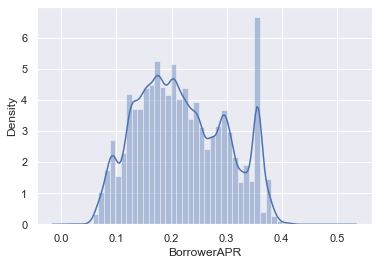

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


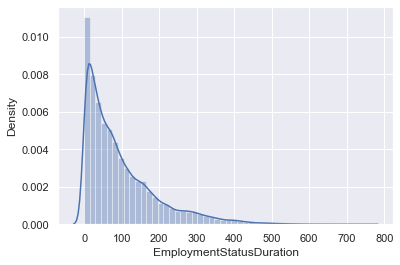

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


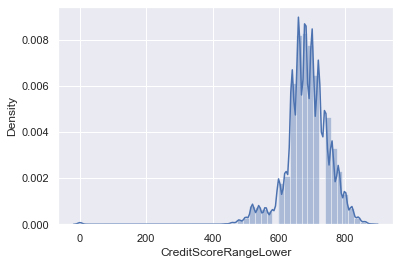

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


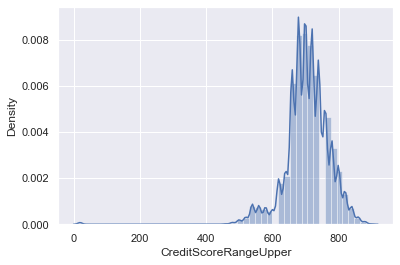

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


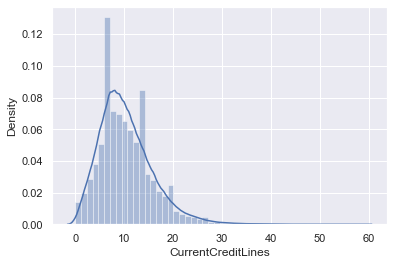

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


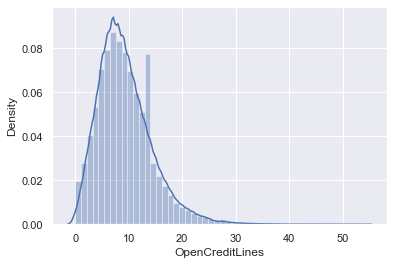

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


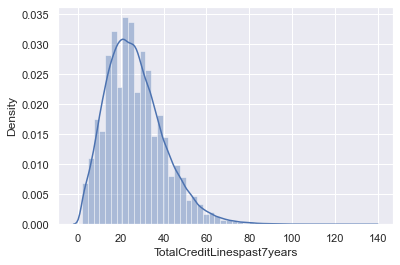

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


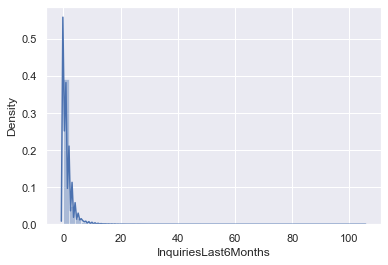

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


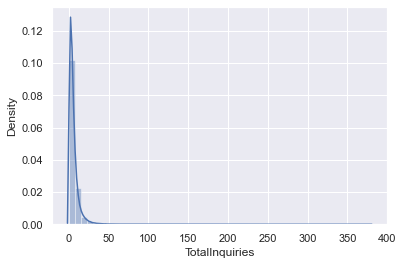

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


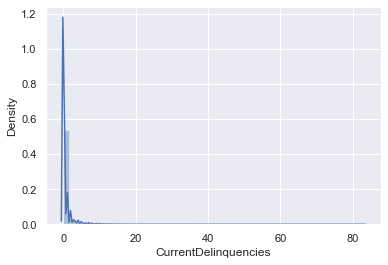

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


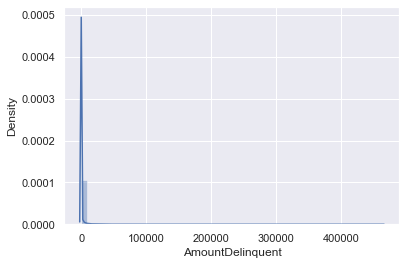

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


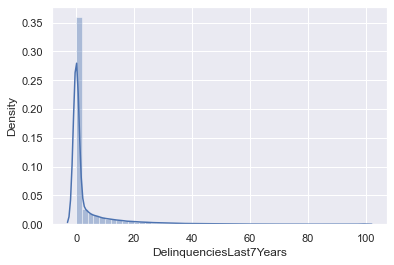

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


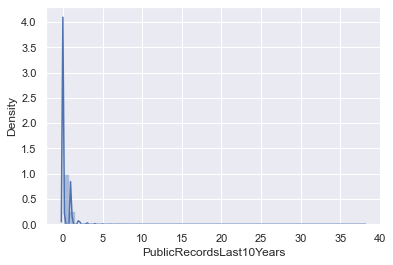

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


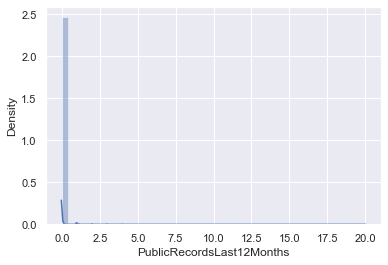

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


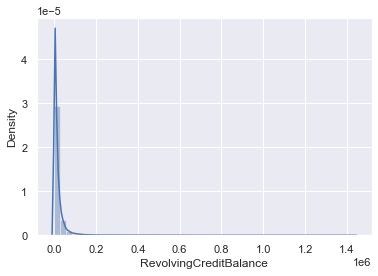

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


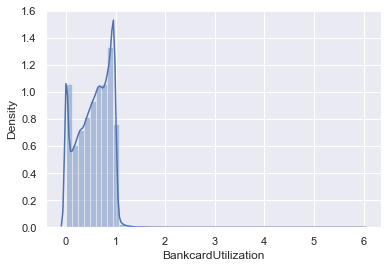

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


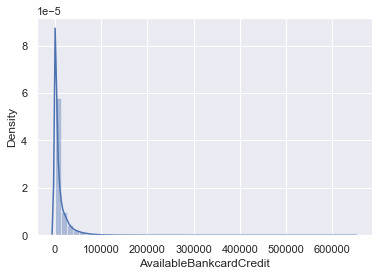

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


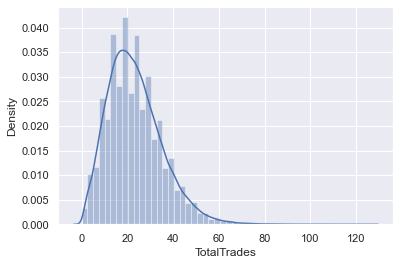

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


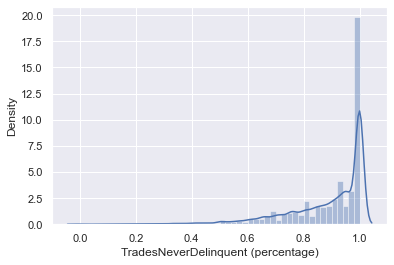

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


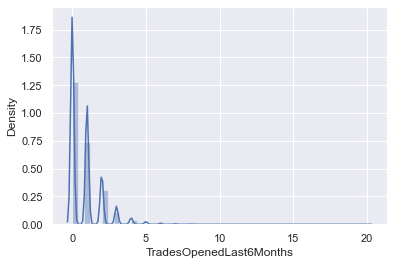

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


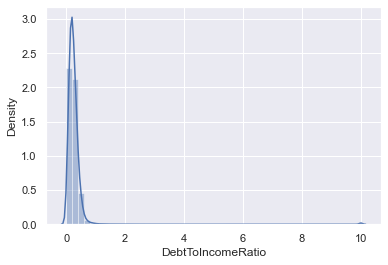

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


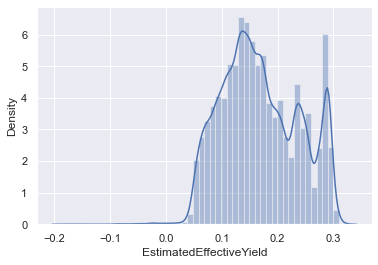

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


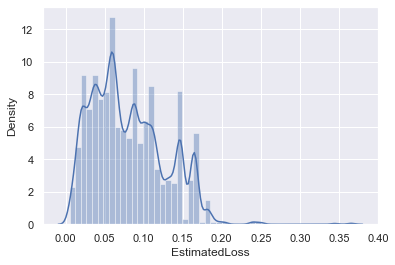

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


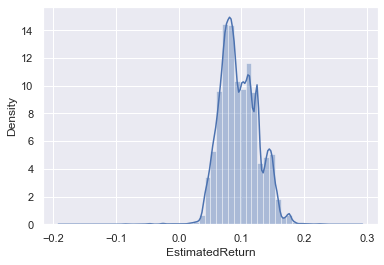

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


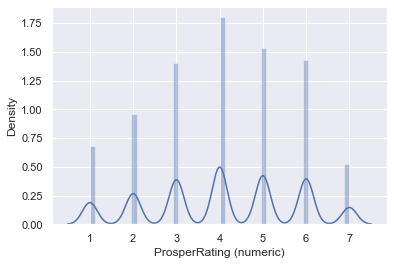

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


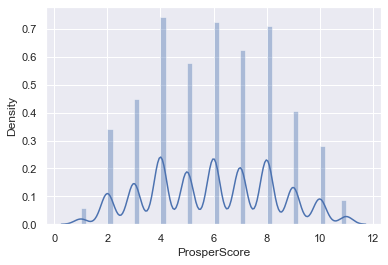

In [27]:
for col in nu_miss_to_impute :
    sns.distplot(loan_data[col])
    plt.show()

#### I can see some skewness in those columns so let's replace the null  values with the medians as it's more representative in this case.

In [28]:
loan_data[nu_miss_to_impute].isnull().sum()

BorrowerAPR                              25
EmploymentStatusDuration               7625
CreditScoreRangeLower                   591
CreditScoreRangeUpper                   591
CurrentCreditLines                     7604
OpenCreditLines                        7604
TotalCreditLinespast7years              697
InquiriesLast6Months                    697
TotalInquiries                         1159
CurrentDelinquencies                    697
AmountDelinquent                       7622
DelinquenciesLast7Years                 990
PublicRecordsLast10Years                697
PublicRecordsLast12Months              7604
RevolvingCreditBalance                 7604
BankcardUtilization                    7604
AvailableBankcardCredit                7544
TotalTrades                            7544
TradesNeverDelinquent (percentage)     7544
TradesOpenedLast6Months                7544
DebtToIncomeRatio                      8554
EstimatedEffectiveYield               29084
EstimatedLoss                   

In [29]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
imp.fit(loan_data[fnu_miss_to_impute])

SimpleImputer(strategy='median')

In [30]:
loan_data[fnu_miss_to_impute] = imp.transform(loan_data[fnu_miss_to_impute])

In [31]:
loan_data[nu_miss_to_impute].isnull().sum()

BorrowerAPR                               0
EmploymentStatusDuration                  0
CreditScoreRangeLower                     0
CreditScoreRangeUpper                     0
CurrentCreditLines                        0
OpenCreditLines                           0
TotalCreditLinespast7years                0
InquiriesLast6Months                      0
TotalInquiries                            0
CurrentDelinquencies                      0
AmountDelinquent                          0
DelinquenciesLast7Years                   0
PublicRecordsLast10Years                  0
PublicRecordsLast12Months                 0
RevolvingCreditBalance                    0
BankcardUtilization                       0
AvailableBankcardCredit                   0
TotalTrades                               0
TradesNeverDelinquent (percentage)        0
TradesOpenedLast6Months                   0
DebtToIncomeRatio                      8554
EstimatedEffectiveYield               29084
EstimatedLoss                   

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


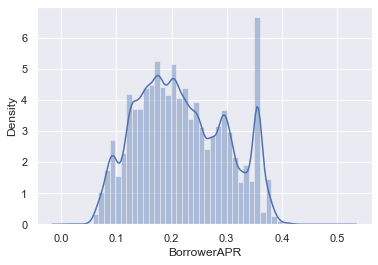

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


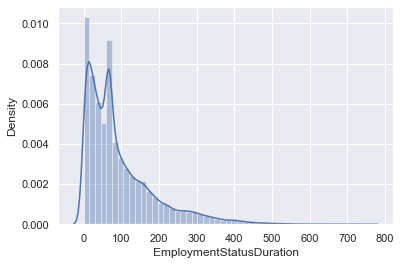

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


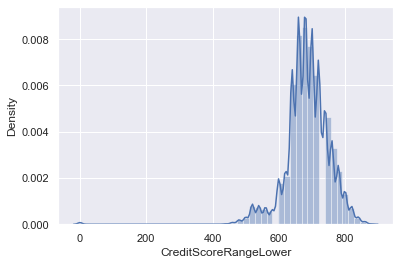

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


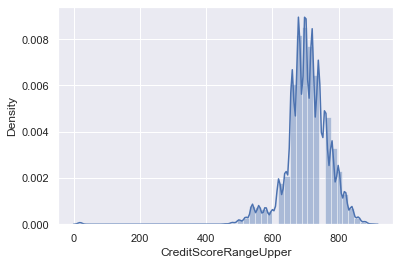

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


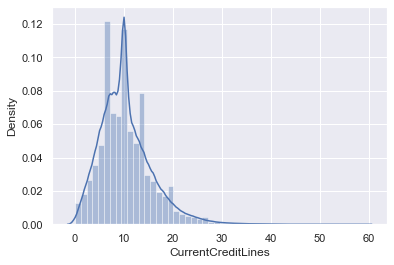

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


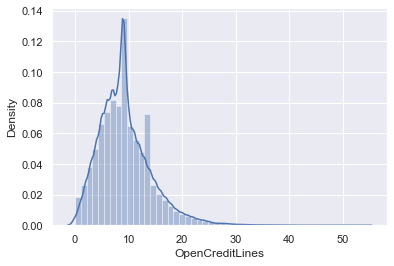

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


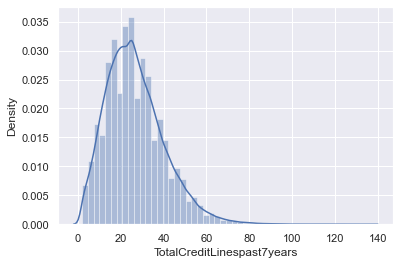

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


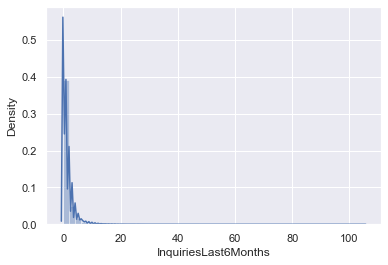

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


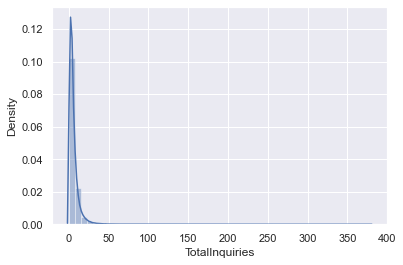

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


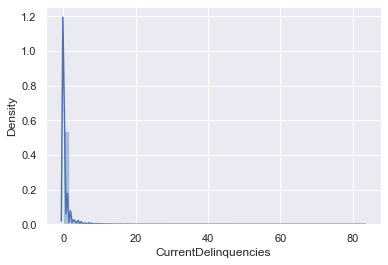

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


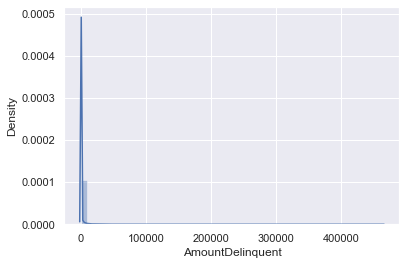

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


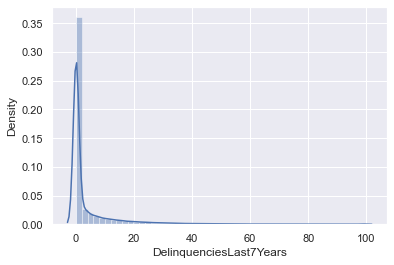

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


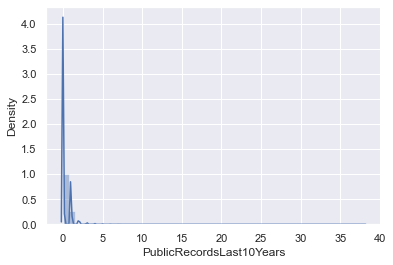

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


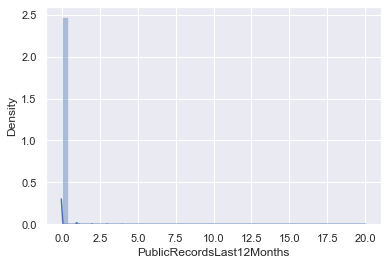

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


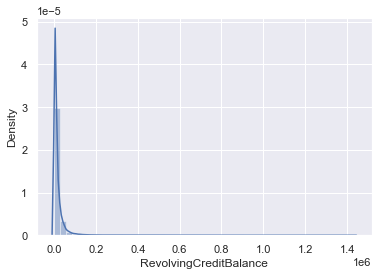

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


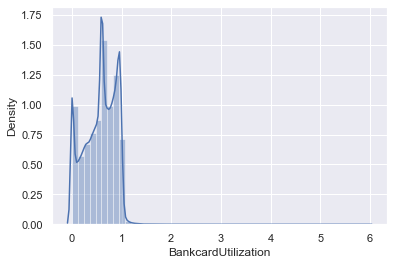

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


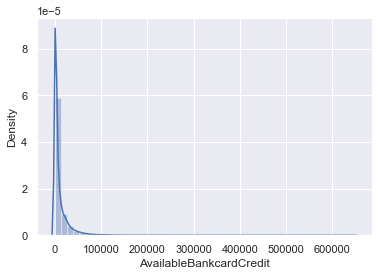

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


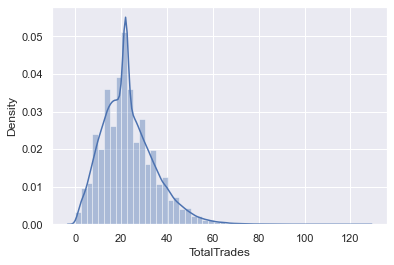

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


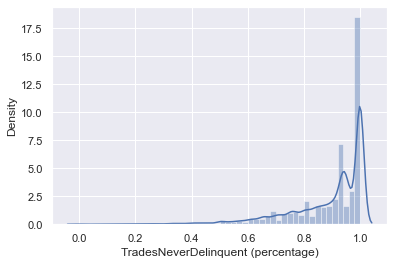

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


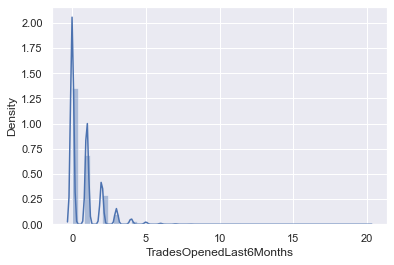

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


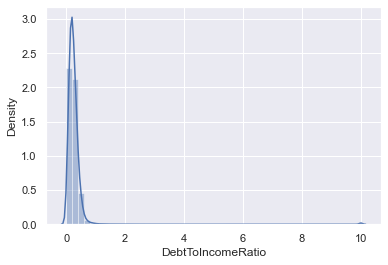

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


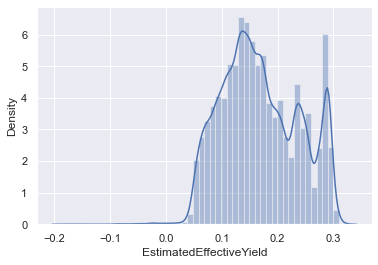

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


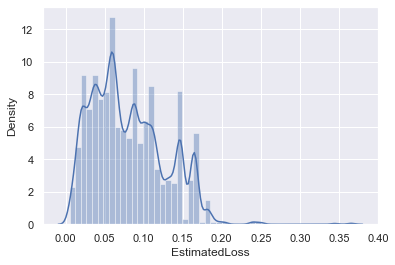

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


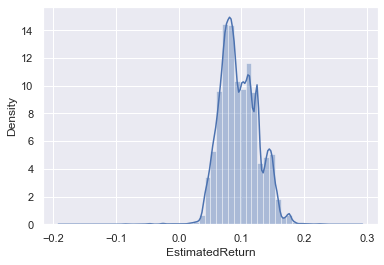

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


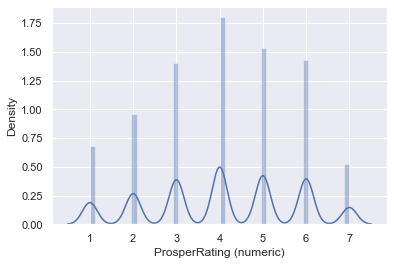

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


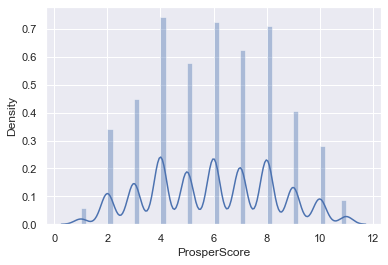

In [32]:
for col in nu_miss_to_impute :
    sns.distplot(loan_data[col])
    plt.show()

## now let's get rid of the categorical missing data

In [33]:
fcat_miss_to_impute

['BorrowerState', 'Occupation', 'EmploymentStatus', 'FirstRecordedCreditLine']

In [34]:
imp_cat = SimpleImputer(strategy='most_frequent')
loan_data[fcat_miss_to_impute] = imp_cat.fit_transform(loan_data[fcat_miss_to_impute])

In [35]:
loan_data[cat_miss_to_impute].isnull().any()

BorrowerState              False
Occupation                 False
EmploymentStatus           False
FirstRecordedCreditLine    False
ProsperRating (Alpha)       True
dtype: bool

In [36]:
loan_data[["EmploymentStatus","ProsperRating (Alpha)"]].nunique()#.value_counts()

EmploymentStatus         8
ProsperRating (Alpha)    7
dtype: int64

In [37]:
loan_data["EmploymentStatus"].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

In [38]:
loan_data["ProsperRating (Alpha)"].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

##### [EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperScore','ProsperRating (Alpha)'] the missing values in those columns could be that they don't exist or may be just missing.

## feature enginnering 

In [39]:
for i in range(loan_data.shape[0]):
    if (loan_data["LoanOriginationDate"].iloc[i].year == 2009)&(loan_data["LoanOriginationDate"].iloc[i].month == 7):
        #if loan_data['ProsperScore'].iloc[i].isnull():
            print(i,loan_data['ProsperScore'].iloc[i],loan_data["LoanOriginationDate"].iloc[i])

5760 1.0 2009-07-30 00:00:00
8425 9.0 2009-07-31 00:00:00
12899 9.0 2009-07-30 00:00:00
18374 9.0 2009-07-22 00:00:00
22131 8.0 2009-07-30 00:00:00
39013 10.0 2009-07-20 00:00:00
43469 10.0 2009-07-27 00:00:00
44548 nan 2009-07-31 00:00:00
45007 nan 2009-07-28 00:00:00
47705 10.0 2009-07-27 00:00:00
56393 10.0 2009-07-30 00:00:00
57626 nan 2009-07-22 00:00:00
60401 7.0 2009-07-22 00:00:00
64513 10.0 2009-07-31 00:00:00
71012 nan 2009-07-29 00:00:00
86631 8.0 2009-07-24 00:00:00
96461 9.0 2009-07-29 00:00:00
104683 9.0 2009-07-30 00:00:00
109683 7.0 2009-07-23 00:00:00
113590 10.0 2009-07-29 00:00:00


In [40]:
critical_indeces = [44548, 45007, 57626, 71012]
loan_data["LoanOriginationDate"].iloc[critical_indeces]

44548   2009-07-31
45007   2009-07-28
57626   2009-07-22
71012   2009-07-29
Name: LoanOriginationDate, dtype: datetime64[ns]

In [41]:
for i in range(loan_data.shape[0]):
    if (loan_data["LoanOriginationDate"].iloc[i].year == 2009)&(loan_data["LoanOriginationDate"].iloc[i].month > 7):
        #if loan_data['ProsperScore'].iloc[i].isnull():
            print(i,loan_data['ProsperScore'].iloc[i],loan_data["LoanOriginationDate"].iloc[i])

102 9.0 2009-09-15 00:00:00
140 9.0 2009-10-20 00:00:00
147 10.0 2009-09-22 00:00:00
248 10.0 2009-11-04 00:00:00
344 9.0 2009-12-04 00:00:00
425 9.0 2009-11-09 00:00:00
545 5.0 2009-11-04 00:00:00
567 5.0 2009-11-09 00:00:00
724 9.0 2009-11-03 00:00:00
725 nan 2009-11-12 00:00:00
728 6.0 2009-08-28 00:00:00
751 9.0 2009-10-15 00:00:00
768 5.0 2009-11-27 00:00:00
858 6.0 2009-08-10 00:00:00
950 9.0 2009-09-11 00:00:00
977 6.0 2009-12-30 00:00:00
1013 10.0 2009-12-23 00:00:00
1022 9.0 2009-11-27 00:00:00
1058 9.0 2009-09-30 00:00:00
1179 9.0 2009-10-22 00:00:00
1228 7.0 2009-11-05 00:00:00
1360 6.0 2009-12-29 00:00:00
1531 8.0 2009-08-05 00:00:00
1547 6.0 2009-10-14 00:00:00
1598 8.0 2009-10-08 00:00:00
1782 5.0 2009-08-28 00:00:00
1978 10.0 2009-08-13 00:00:00
2345 7.0 2009-08-31 00:00:00
2365 8.0 2009-12-30 00:00:00
2556 9.0 2009-09-03 00:00:00
2658 8.0 2009-09-03 00:00:00
2685 8.0 2009-12-15 00:00:00
2726 8.0 2009-11-25 00:00:00
2728 9.0 2009-11-09 00:00:00
2760 9.0 2009-12-04 00:00:

18535 9.0 2009-11-30 00:00:00
18685 9.0 2009-09-23 00:00:00
18754 10.0 2009-09-21 00:00:00
18758 9.0 2009-11-09 00:00:00
18863 9.0 2009-10-27 00:00:00
18878 9.0 2009-09-03 00:00:00
18887 4.0 2009-10-22 00:00:00
18942 8.0 2009-11-27 00:00:00
18987 10.0 2009-12-31 00:00:00
19062 8.0 2009-12-29 00:00:00
19071 7.0 2009-09-18 00:00:00
19073 8.0 2009-10-20 00:00:00
19140 8.0 2009-10-23 00:00:00
19230 7.0 2009-12-03 00:00:00
19286 8.0 2009-12-29 00:00:00
19411 9.0 2009-08-19 00:00:00
19447 8.0 2009-11-30 00:00:00
19537 6.0 2009-10-07 00:00:00
19559 10.0 2009-12-28 00:00:00
19710 7.0 2009-10-26 00:00:00
19739 10.0 2009-10-14 00:00:00
19755 8.0 2009-08-04 00:00:00
19940 9.0 2009-12-03 00:00:00
19994 9.0 2009-10-09 00:00:00
20066 9.0 2009-11-13 00:00:00
20299 7.0 2009-09-09 00:00:00
20373 7.0 2009-10-19 00:00:00
20406 8.0 2009-11-04 00:00:00
20521 8.0 2009-08-19 00:00:00
20525 7.0 2009-12-17 00:00:00
20645 2.0 2009-11-24 00:00:00
20667 10.0 2009-12-02 00:00:00
20730 7.0 2009-10-27 00:00:00
20746

37379 5.0 2009-11-16 00:00:00
37420 10.0 2009-10-14 00:00:00
37443 7.0 2009-08-12 00:00:00
37608 9.0 2009-10-27 00:00:00
37611 5.0 2009-10-02 00:00:00
37709 7.0 2009-11-03 00:00:00
37736 9.0 2009-08-04 00:00:00
37824 8.0 2009-12-16 00:00:00
38034 7.0 2009-11-19 00:00:00
38064 9.0 2009-08-13 00:00:00
38066 7.0 2009-10-29 00:00:00
38108 9.0 2009-09-01 00:00:00
38132 9.0 2009-08-06 00:00:00
38199 10.0 2009-10-20 00:00:00
38213 7.0 2009-11-24 00:00:00
38273 9.0 2009-12-08 00:00:00
38276 9.0 2009-10-15 00:00:00
38288 7.0 2009-10-27 00:00:00
38299 4.0 2009-12-15 00:00:00
38414 4.0 2009-12-31 00:00:00
38496 4.0 2009-10-20 00:00:00
38531 9.0 2009-08-11 00:00:00
38720 6.0 2009-11-09 00:00:00
38793 10.0 2009-10-27 00:00:00
38893 10.0 2009-10-14 00:00:00
38907 9.0 2009-10-20 00:00:00
38932 9.0 2009-09-02 00:00:00
39043 9.0 2009-10-15 00:00:00
39089 5.0 2009-11-23 00:00:00
39119 9.0 2009-11-09 00:00:00
39122 6.0 2009-11-03 00:00:00
39194 7.0 2009-09-02 00:00:00
39304 8.0 2009-12-21 00:00:00
39335 

55049 7.0 2009-10-06 00:00:00
55105 9.0 2009-12-31 00:00:00
55180 8.0 2009-10-13 00:00:00
55216 5.0 2009-10-29 00:00:00
55240 9.0 2009-08-27 00:00:00
55261 10.0 2009-09-18 00:00:00
55346 10.0 2009-08-11 00:00:00
55482 9.0 2009-10-30 00:00:00
55497 10.0 2009-12-03 00:00:00
55557 7.0 2009-10-27 00:00:00
55560 9.0 2009-12-11 00:00:00
55574 8.0 2009-11-18 00:00:00
55616 10.0 2009-11-06 00:00:00
55639 9.0 2009-10-27 00:00:00
55690 6.0 2009-11-17 00:00:00
55714 9.0 2009-12-31 00:00:00
55773 9.0 2009-10-30 00:00:00
55778 9.0 2009-10-08 00:00:00
55815 6.0 2009-10-15 00:00:00
55884 6.0 2009-11-09 00:00:00
55915 10.0 2009-12-18 00:00:00
55975 9.0 2009-10-22 00:00:00
55994 8.0 2009-12-03 00:00:00
56043 9.0 2009-11-13 00:00:00
56044 9.0 2009-08-18 00:00:00
56074 5.0 2009-08-19 00:00:00
56084 9.0 2009-12-30 00:00:00
56092 8.0 2009-10-27 00:00:00
56102 9.0 2009-09-16 00:00:00
56177 9.0 2009-12-15 00:00:00
56317 9.0 2009-12-02 00:00:00
56359 10.0 2009-08-17 00:00:00
56364 9.0 2009-08-18 00:00:00
5637

71990 5.0 2009-11-30 00:00:00
72014 4.0 2009-09-29 00:00:00
72156 5.0 2009-10-27 00:00:00
72161 8.0 2009-11-05 00:00:00
72263 7.0 2009-11-19 00:00:00
72366 9.0 2009-08-06 00:00:00
72420 9.0 2009-09-25 00:00:00
72527 10.0 2009-10-16 00:00:00
72566 9.0 2009-11-02 00:00:00
72633 10.0 2009-09-11 00:00:00
72646 4.0 2009-11-16 00:00:00
72821 8.0 2009-09-29 00:00:00
72865 6.0 2009-11-30 00:00:00
72877 8.0 2009-12-22 00:00:00
72883 5.0 2009-11-04 00:00:00
72912 9.0 2009-12-30 00:00:00
73050 7.0 2009-09-01 00:00:00
73122 10.0 2009-12-21 00:00:00
73172 7.0 2009-12-30 00:00:00
73178 9.0 2009-08-11 00:00:00
73221 7.0 2009-11-27 00:00:00
73269 8.0 2009-12-09 00:00:00
73355 8.0 2009-11-13 00:00:00
73440 8.0 2009-08-04 00:00:00
73457 9.0 2009-12-31 00:00:00
73505 9.0 2009-12-30 00:00:00
73527 10.0 2009-10-30 00:00:00
73590 9.0 2009-08-28 00:00:00
73647 8.0 2009-10-27 00:00:00
73691 5.0 2009-12-29 00:00:00
73754 9.0 2009-09-11 00:00:00
73788 10.0 2009-12-31 00:00:00
73844 5.0 2009-10-27 00:00:00
73853

91961 7.0 2009-12-21 00:00:00
92137 8.0 2009-08-06 00:00:00
92180 9.0 2009-12-17 00:00:00
92278 9.0 2009-11-16 00:00:00
92288 9.0 2009-10-27 00:00:00
92324 8.0 2009-11-27 00:00:00
92340 nan 2009-11-30 00:00:00
92413 9.0 2009-12-31 00:00:00
92455 9.0 2009-11-30 00:00:00
92486 8.0 2009-09-24 00:00:00
92591 8.0 2009-09-01 00:00:00
92691 2.0 2009-12-24 00:00:00
92725 9.0 2009-08-03 00:00:00
92744 8.0 2009-12-16 00:00:00
92756 10.0 2009-11-19 00:00:00
92810 9.0 2009-12-15 00:00:00
93010 7.0 2009-12-24 00:00:00
93025 9.0 2009-11-30 00:00:00
93084 7.0 2009-10-20 00:00:00
93163 10.0 2009-11-17 00:00:00
93201 5.0 2009-12-31 00:00:00
93303 9.0 2009-10-28 00:00:00
93349 9.0 2009-11-13 00:00:00
93475 9.0 2009-11-23 00:00:00
93491 9.0 2009-09-18 00:00:00
93582 2.0 2009-10-16 00:00:00
93594 9.0 2009-12-31 00:00:00
93681 nan 2009-11-13 00:00:00
93751 10.0 2009-11-17 00:00:00
93827 9.0 2009-10-21 00:00:00
93915 10.0 2009-11-27 00:00:00
94021 8.0 2009-10-02 00:00:00
94066 8.0 2009-10-28 00:00:00
94077 

111515 4.0 2009-11-12 00:00:00
111535 9.0 2009-09-02 00:00:00
111682 8.0 2009-10-14 00:00:00
111766 9.0 2009-09-15 00:00:00
111770 9.0 2009-12-14 00:00:00
111945 8.0 2009-09-10 00:00:00
112046 9.0 2009-11-30 00:00:00
112118 nan 2009-08-13 00:00:00
112155 9.0 2009-09-24 00:00:00
112160 10.0 2009-12-02 00:00:00
112218 5.0 2009-11-24 00:00:00
112268 8.0 2009-12-30 00:00:00
112270 7.0 2009-10-13 00:00:00
112306 7.0 2009-12-03 00:00:00
112352 8.0 2009-12-21 00:00:00
112430 9.0 2009-09-23 00:00:00
112464 9.0 2009-09-02 00:00:00
112506 9.0 2009-10-15 00:00:00
112558 2.0 2009-10-28 00:00:00
112614 10.0 2009-12-30 00:00:00
112763 nan 2009-08-13 00:00:00
112767 10.0 2009-12-21 00:00:00
112970 5.0 2009-11-16 00:00:00
112974 8.0 2009-10-09 00:00:00
112976 9.0 2009-12-31 00:00:00
113079 10.0 2009-10-21 00:00:00
113261 5.0 2009-09-23 00:00:00
113359 9.0 2009-12-31 00:00:00
113502 6.0 2009-09-15 00:00:00
113617 1.0 2009-10-16 00:00:00
113618 8.0 2009-11-12 00:00:00
113674 7.0 2009-08-17 00:00:00
1137

In [42]:
for i in range(loan_data.shape[0]):
    if (loan_data["LoanOriginationDate"].iloc[i].year == 2009)&(loan_data["LoanOriginationDate"].iloc[i].month < 7):
        #if loan_data['ProsperScore'].iloc[i].isnull():
            print(i,loan_data['ProsperScore'].iloc[i],loan_data["LoanOriginationDate"].iloc[i])

3140 nan 2009-05-14 00:00:00
17774 nan 2009-05-07 00:00:00
24433 nan 2009-05-07 00:00:00
28094 nan 2009-05-12 00:00:00
35790 nan 2009-05-13 00:00:00
51937 nan 2009-05-13 00:00:00
92238 nan 2009-05-06 00:00:00
93105 nan 2009-05-12 00:00:00
97545 nan 2009-05-12 00:00:00
102440 nan 2009-05-07 00:00:00
102795 nan 2009-05-06 00:00:00
103392 nan 2009-05-14 00:00:00
109025 nan 2009-05-13 00:00:00


In [43]:
loan_data["LoanOriginationDate"]

0        2007-09-12
1        2014-03-03
2        2007-01-17
3        2012-11-01
4        2013-09-20
            ...    
113932   2013-04-22
113933   2011-11-07
113934   2013-12-23
113935   2011-11-21
113936   2014-01-21
Name: LoanOriginationDate, Length: 113937, dtype: datetime64[ns]

In [44]:
loan_data['after_July2009'] = None
for i in range(loan_data.shape[0]):
    if ((loan_data["LoanOriginationDate"].iloc[i].year == 2009)&(loan_data["LoanOriginationDate"].iloc[i].month < 7))or(loan_data["LoanOriginationDate"].iloc[i].year < 2009):
        loan_data['after_July2009'].iloc[i] = 0
    else:
        loan_data['after_July2009'].iloc[i] = 1

C:\Users\m2021\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
loan_data['after_July2009']

0         0
1         1
2         0
3         1
4         1
         ..
113932    1
113933    1
113934    1
113935    1
113936    1
Name: after_July2009, Length: 113937, dtype: object

# ---------------------------------------------------------------------------------------------------------------

In [46]:
need_some_analysis = cols_with_high_missing[2:]  # Based on the documentation and the description
need_some_analysis

['GroupKey',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanFirstDefaultedCycleNumber']

In [47]:
interesting_cols

['DebtToIncomeRatio',
 'LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees']

### Is this value missing because it wasn't recorded or because it doesn't exist? 
#### If a value is missing becuase it doesn't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN.

### I will keep the null values of the columns in the list "need_some_analysis", because actualy they are not missing the data is just doesn't exist and they can tell us that the borrower had no prior loans ( they contain some information )

In [48]:
loan_data[need_some_analysis]

,GroupKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanFirstDefaultedCycleNumber
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,783C3371218786870A73D20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,11.0,11.0,0.0,0.0,11000.0,9947.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
113932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113933,NaN,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,NaN
113934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113935,NaN,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,NaN


In [49]:
loan_data['TotalProsperLoans'].isnull().sum() + loan_data['TotalProsperLoans'].value_counts().sum()

113937

In [50]:
loan_data[need_some_analysis[1:]]

,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanFirstDefaultedCycleNumber
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,11.0,11.0,0.0,0.0,11000.0,9947.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...
113932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113933,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,NaN
113934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113935,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,NaN


In [51]:
loan_data[loan_data["TotalProsperLoans"].isnull() & loan_data["TotalProsperPaymentsBilled"].isnull() & loan_data["OnTimeProsperPayments"].isnull() & loan_data["ProsperPaymentsLessThanOneMonthLate"].isnull() & loan_data["ProsperPaymentsOneMonthPlusLate"].isnull() & loan_data["ProsperPrincipalBorrowed"].isnull() & loan_data["ProsperPrincipalOutstanding"].isnull() ] 

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,after_July2009
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,1
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113929,E3553583161337791FCB87F,830413,2013-07-06 17:40:01.657,NaN,36,Completed,2014-02-07 00:00:00,0.30285,0.2639,0.2539,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,26,1
113931,E36F36005339663245C20F8,1141292,2014-01-16 20:13:08.040,NaN,60,Current,NaN,0.15016,0.1274,0.1174,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,1
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,1
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119,1


In [52]:
113937 - 91852 

22085

In [53]:
loan_data[need_some_analysis].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   GroupKey                             13341 non-null  object 
 1   TotalProsperLoans                    22085 non-null  float64
 2   TotalProsperPaymentsBilled           22085 non-null  float64
 3   OnTimeProsperPayments                22085 non-null  float64
 4   ProsperPaymentsLessThanOneMonthLate  22085 non-null  float64
 5   ProsperPaymentsOneMonthPlusLate      22085 non-null  float64
 6   ProsperPrincipalBorrowed             22085 non-null  float64
 7   ProsperPrincipalOutstanding          22085 non-null  float64
 8   ScorexChangeAtTimeOfListing          18928 non-null  float64
 9   LoanFirstDefaultedCycleNumber        16952 non-null  float64
dtypes: float64(9), object(1)
memory usage: 8.7+ MB


In [54]:
loan_data[loan_data["TotalProsperLoans"].isnull() & loan_data["TotalProsperPaymentsBilled"].isnull() & loan_data["OnTimeProsperPayments"].isnull() & loan_data["ProsperPaymentsLessThanOneMonthLate"].isnull() & loan_data["ProsperPaymentsOneMonthPlusLate"].isnull() & loan_data["ProsperPrincipalBorrowed"].isnull() & loan_data["ProsperPrincipalOutstanding"].isnull()].isnull().sum()[loan_data[loan_data["TotalProsperLoans"].isnull() & loan_data["TotalProsperPaymentsBilled"].isnull() & loan_data["OnTimeProsperPayments"].isnull() & loan_data["ProsperPaymentsLessThanOneMonthLate"].isnull() & loan_data["ProsperPaymentsOneMonthPlusLate"].isnull() & loan_data["ProsperPrincipalBorrowed"].isnull() & loan_data["ProsperPrincipalOutstanding"].isnull() & loan_data["ScorexChangeAtTimeOfListing"].isnull()].isnull().sum() > 0 ]

CreditGrade                            65128
ClosedDate                             47302
EstimatedEffectiveYield                26796
EstimatedLoss                          26796
EstimatedReturn                        26796
ProsperRating (numeric)                26796
ProsperRating (Alpha)                  26796
ProsperScore                           26796
GroupKey                               81156
DebtToIncomeRatio                       6384
TotalProsperLoans                      91852
TotalProsperPaymentsBilled             91852
OnTimeProsperPayments                  91852
ProsperPaymentsLessThanOneMonthLate    91852
ProsperPaymentsOneMonthPlusLate        91852
ProsperPrincipalBorrowed               91852
ProsperPrincipalOutstanding            91852
ScorexChangeAtTimeOfListing            91852
LoanFirstDefaultedCycleNumber          77330
dtype: int64

In [55]:
113937 - 91852  # ScorexChangeAtTimeOfListing            

22085

In [56]:
loan_data[need_some_analysis]

,GroupKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanFirstDefaultedCycleNumber
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,783C3371218786870A73D20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,11.0,11.0,0.0,0.0,11000.0,9947.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
113932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113933,NaN,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,NaN
113934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113935,NaN,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,NaN


In [57]:
113937 - 77330  # LoanFirstDefaultedCycleNumber          

36607

In [58]:
loan_data["TotalProsperLoans"].isnull() & loan_data["TotalProsperPaymentsBilled"].isnull() & loan_data["OnTimeProsperPayments"].isnull() & loan_data["ProsperPaymentsLessThanOneMonthLate"].isnull() & loan_data["ProsperPaymentsOneMonthPlusLate"].isnull() & loan_data["ProsperPrincipalBorrowed"].isnull() & loan_data["ProsperPrincipalOutstanding"].isnull() & loan_data["ScorexChangeAtTimeOfListing"].isnull()

0          True
1          True
2          True
3          True
4         False
          ...  
113932     True
113933    False
113934     True
113935    False
113936     True
Length: 113937, dtype: bool

In [59]:
loan_data["had_PriorLoans"] = 1 - (loan_data["TotalProsperLoans"].isnull() & loan_data["TotalProsperPaymentsBilled"].isnull() & loan_data["OnTimeProsperPayments"].isnull() & loan_data["ProsperPaymentsLessThanOneMonthLate"].isnull() & loan_data["ProsperPaymentsOneMonthPlusLate"].isnull() & loan_data["ProsperPrincipalBorrowed"].isnull() & loan_data["ProsperPrincipalOutstanding"].isnull() & loan_data["ScorexChangeAtTimeOfListing"].isnull())

In [60]:
loan_data["had_PriorLoans"]

0         0
1         0
2         0
3         0
4         1
         ..
113932    0
113933    1
113934    0
113935    1
113936    0
Name: had_PriorLoans, Length: 113937, dtype: int32

In [61]:
113937 - loan_data['LoanFirstDefaultedCycleNumber'].isnull().sum()

16952

In [62]:
loan_data["Is_ChargedOff"] = 1 - loan_data["LoanFirstDefaultedCycleNumber"].isnull()

In [63]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 84 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113937 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [65]:
loan_data[loan_data['LoanStatus'] == 'Chargedoff'][interesting_cols]

,DebtToIncomeRatio,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees
17,0.12,5325.33,3987.33,1338.00
42,0.27,817.18,403.08,414.10
57,0.15,890.63,430.97,459.66
62,0.59,23511.66,14754.94,8756.72
74,0.21,2721.75,1468.11,1253.64
...,...,...,...,...
113876,0.12,5029.90,1903.85,3126.05
113889,0.17,3202.56,2917.93,284.63
113896,0.26,186.66,79.39,107.27
113904,0.55,5884.95,3317.24,2567.71


In [68]:
loan_data['exclude_recoveries'] = None
for i in range(loan_data.shape[0]) :
    if loan_data['LoanStatus'].iloc[i] == 'Chargedoff' :
        loan_data['exclude_recoveries'].iloc[i] = 1
    else:
        loan_data['exclude_recoveries'].iloc[i] = 0

C:\Users\m2021\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [75]:
Sum = 0
for i in range(loan_data.shape[0]) :
    if loan_data['DebtToIncomeRatio'].isnull().iloc[i] == True:
        Sum += 1
print(Sum)

8554


In [76]:
loan_data['availability_DebtToIncomeRatio'] = None
for i in range(loan_data.shape[0]) :
    if loan_data['DebtToIncomeRatio'].isnull().iloc[i] == True:
        loan_data['availability_DebtToIncomeRatio'].iloc[i] = 0
    else:
        loan_data['availability_DebtToIncomeRatio'].iloc[i] = 1

In [77]:
loan_data['DebtToIncomeRatio'].describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

C:\Users\m2021\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


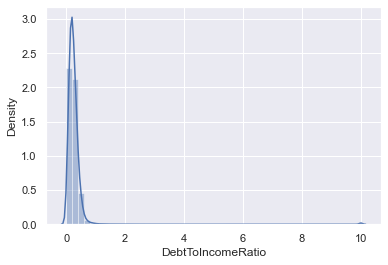

In [79]:
sns.distplot(loan_data['DebtToIncomeRatio'])
plt.show()

In [80]:
loan_data['DebtToIncomeRatio_Larger_10'] = None
for i in range(loan_data.shape[0]) :
    if loan_data['DebtToIncomeRatio'].iloc[i] == 10.01:
        loan_data['DebtToIncomeRatio_Larger_10'].iloc[i] = 1
    else:
        loan_data['DebtToIncomeRatio_Larger_10'].iloc[i] = 0

C:\Users\m2021\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [81]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 87 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113937 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

### what I need to deal with now is just two columns  ['CreditGrade','ClosedDate'] and the keys columns also

In [82]:
loan_data[['CreditGrade','ClosedDate','ListingCreationDate']]

,CreditGrade,ClosedDate,ListingCreationDate
0,C,2009-08-14 00:00:00,2007-08-26 19:09:29.263
1,NaN,NaN,2014-02-27 08:28:07.900
2,HR,2009-12-17 00:00:00,2007-01-05 15:00:47.090
3,NaN,NaN,2012-10-22 11:02:35.010
4,NaN,NaN,2013-09-14 18:38:39.097
...,...,...,...
113932,NaN,NaN,2013-04-14 05:55:02.663
113933,NaN,NaN,2011-11-03 20:42:55.333
113934,NaN,NaN,2013-12-13 05:49:12.703
113935,NaN,2013-08-13 00:00:00,2011-11-14 13:18:26.597


In [83]:
a = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']
nulldemo = pd.DataFrame(a)
nulldemo

,0
0,NaN
1,None
2,[]
3,{}
4,NaN
5,Null
6,NULL
7,None
8,NA
9,?


In [84]:
strange_indeces = []
for i in range(len(loan_data["ListingCreationDate"])):
    if loan_data["ListingCreationDate"][i].year == 2009:
        if loan_data['CreditGrade'][i] not in a:
            strange_indeces.append(i)
            print(i)

3140
17774
24433
28094
35790
51937
92238
93105
97545
102440
102795
103392
109025


In [85]:
loan_data["CreditGrade"].iloc[strange_indeces]

3140       B
17774      B
24433      A
28094      C
35790      C
51937      D
92238      A
93105      B
97545      C
102440     C
102795     D
103392     C
109025    AA
Name: CreditGrade, dtype: object

In [86]:
loan_data["ListingCreationDate"].iloc[strange_indeces]

3140     2009-05-02 17:17:33.677
17774    2009-04-28 18:19:41.690
24433    2009-04-29 19:34:54.347
28094    2009-05-04 04:59:18.020
35790    2009-04-30 16:06:43.743
51937    2009-04-30 08:53:14.533
92238    2009-04-30 13:21:56.020
93105    2009-05-02 07:42:03.340
97545    2009-04-28 12:57:46.093
102440   2009-04-28 04:43:39.080
102795   2009-04-28 05:19:21.340
103392   2009-05-04 13:07:15.977
109025   2009-04-29 19:52:28.173
Name: ListingCreationDate, dtype: datetime64[ns]

In [87]:
loan_data['Is_CreditGradeApplicable'] = None

In [88]:
for i in range(len(loan_data["ListingCreationDate"])):
    if (loan_data["ListingCreationDate"].iloc[i].year < 2009) or (i in strange_indeces):
        loan_data['Is_CreditGradeApplicable'].iloc[i] = 1
    else :
        loan_data['Is_CreditGradeApplicable'].iloc[i] = 0

C:\Users\m2021\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [89]:
loan_data["Is_CreditGradeApplicable"].iloc[strange_indeces]

3140      1
17774     1
24433     1
28094     1
35790     1
51937     1
92238     1
93105     1
97545     1
102440    1
102795    1
103392    1
109025    1
Name: Is_CreditGradeApplicable, dtype: object

In [90]:
loan_data["Is_CreditGradeApplicable"] = loan_data["Is_CreditGradeApplicable"].astype('int')
loan_data["after_July2009"] = loan_data["after_July2009"].astype('int')

In [91]:
loan_data["CreditGrade"]

0           C
1         NaN
2          HR
3         NaN
4         NaN
         ... 
113932    NaN
113933    NaN
113934    NaN
113935    NaN
113936    NaN
Name: CreditGrade, Length: 113937, dtype: object

In [92]:
loan_data["CreditGrade"].unique()

array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object)

In [93]:
loan_data["CreditGrade"] = loan_data["CreditGrade"].fillna('Not_Applicable')

In [94]:
loan_data["CreditGrade"].unique()

array(['C', 'Not_Applicable', 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'],
      dtype=object)

In [95]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 88 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          113937 non-null  object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113937 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [96]:
loan_data['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [82]:
Done = ['Completed','Cancelled','Chargedoff','Defaulted']

In [97]:
late = ['Past Due (1-15 days)','Past Due (16-30 days)','Past Due (61-90 days)', 
 'Past Due (31-60 days)','Past Due (91-120 days)','Past Due (>120 days)']

In [98]:
notyet = ['Current','FinalPaymentInProgress']

In [99]:
for col in loan_data.columns:
    string_null = np.array([x in a[2:] for x in loan_data[col]])
    print(col, loan_data[col].isnull().sum(), string_null.sum())

ListingKey 0 0
ListingNumber 0 0
ListingCreationDate 0 0
CreditGrade 0 0
Term 0 0
LoanStatus 0 0
ClosedDate 58848 0
BorrowerAPR 0 0
BorrowerRate 0 0
LenderYield 0 0
EstimatedEffectiveYield 29084 0
EstimatedLoss 29084 0
EstimatedReturn 29084 0
ProsperRating (numeric) 29084 0
ProsperRating (Alpha) 29084 0
ProsperScore 29084 0
ListingCategory (numeric) 0 0
BorrowerState 0 0
Occupation 0 0
EmploymentStatus 0 0
EmploymentStatusDuration 0 0
IsBorrowerHomeowner 0 0
CurrentlyInGroup 0 0
GroupKey 100596 0
DateCreditPulled 0 0
CreditScoreRangeLower 0 0
CreditScoreRangeUpper 0 0
FirstRecordedCreditLine 0 0
CurrentCreditLines 0 0
OpenCreditLines 0 0
TotalCreditLinespast7years 0 0
OpenRevolvingAccounts 0 0
OpenRevolvingMonthlyPayment 0 0
InquiriesLast6Months 0 0
TotalInquiries 0 0
CurrentDelinquencies 0 0
AmountDelinquent 0 0
DelinquenciesLast7Years 0 0
PublicRecordsLast10Years 0 0
PublicRecordsLast12Months 0 0
RevolvingCreditBalance 0 0
BankcardUtilization 0 0
AvailableBankcardCredit 0 0
TotalTrad

In [100]:
notyet_index = [i for i in range(loan_data.shape[0]) if loan_data["LoanStatus"].iloc[i] in notyet] 
late_index = [i for i in range(loan_data.shape[0]) if loan_data["LoanStatus"].iloc[i] in late] 

In [101]:
len(notyet_index)

56781

In [102]:
len(late_index)

2067

In [103]:
(1 - loan_data["ClosedDate"].isnull()).sum()

55089

In [104]:
55089+2067+56781

113937

In [105]:
loan_data["IsClosed"] = 1 - loan_data["ClosedDate"].isnull()

In [106]:
late_encoded = [-1,-2,-3,-4,-5,-6]

In [107]:
loan_data["IsInProgress"] = None
loan_data["IsLate"] = None

In [108]:
for i in range(loan_data.shape[0]):
    if i in notyet_index:
        loan_data['IsInProgress'].iloc[i] = 1
    else :
        loan_data['IsInProgress'].iloc[i] = 0

In [109]:
for i in range(loan_data.shape[0]):
    if i in late_index:
        loan_data['IsLate'].iloc[i] = late_encoded[late.index(loan_data['LoanStatus'].iloc[i])]
    else :
        loan_data['IsLate'].iloc[i] = 0

In [110]:
loan_data['IsLate'] = loan_data['IsLate'].astype('int')
loan_data['IsInProgress'] = loan_data['IsInProgress'].astype('int')

In [111]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 91 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          113937 non-null  object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113937 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [112]:
loan_data['exclude_recoveries'] = loan_data['exclude_recoveries'].astype('int')
loan_data['availability_DebtToIncomeRatio'] = loan_data['availability_DebtToIncomeRatio'].astype('int')
loan_data['DebtToIncomeRatio_Larger_10'] = loan_data['DebtToIncomeRatio_Larger_10'].astype('int')

In [113]:
#ScorexChangeAtTimeOfListing          18928  ProsperPrincipalOutstanding   OnTimeProsperPayments
(loan_data['ProsperPrincipalOutstanding'].isnull() == loan_data['OnTimeProsperPayments'].isnull()).sum()

113937

In [114]:
(loan_data['ScorexChangeAtTimeOfListing'].isnull() != loan_data['OnTimeProsperPayments'].isnull()).sum()

3157

In [115]:
loan_data['ScorexChangeAtTimeOfListing'].median()

-3.0

In [116]:
loan_data['ScorexChangeAtTimeOfListing'].mean()

-3.2232142857142856

In [117]:
loan_data['ScorexChangeAtTimeOfListing'][(loan_data['ScorexChangeAtTimeOfListing'].isnull() != loan_data['OnTimeProsperPayments'].isnull())] = -3.0 

<ipython-input-117-3b5907393fe9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['ScorexChangeAtTimeOfListing'][(loan_data['ScorexChangeAtTimeOfListing'].isnull() != loan_data['OnTimeProsperPayments'].isnull())] = -3.0


In [118]:
(loan_data['ScorexChangeAtTimeOfListing'].isnull() != loan_data['OnTimeProsperPayments'].isnull()).sum()

0

## now let's see the keys columns

### repeated Listing Key or duplicate values

In [119]:
loan_data["ListingKey"].value_counts()[loan_data["ListingKey"].value_counts() == 2].sum()

1580

In [120]:
loan_data["ListingNumber"].value_counts()[loan_data["ListingNumber"].value_counts() == 2].sum()

1580

### ------------------------------------------------------------------------------------------------------------------------------------------------------

In [121]:
keys_cols = ["ListingKey","ListingNumber","GroupKey","LoanKey","LoanNumber","MemberKey"]
loan_data[keys_cols]

,ListingKey,ListingNumber,GroupKey,LoanKey,LoanNumber,MemberKey
0,1021339766868145413AB3B,193129,NaN,E33A3400205839220442E84,19141,1F3E3376408759268057EDA
1,10273602499503308B223C1,1209647,NaN,9E3B37071505919926B1D82,134815,1D13370546739025387B2F4
2,0EE9337825851032864889A,81716,783C3371218786870A73D20,6954337960046817851BCB2,6466,5F7033715035555618FA612
3,0EF5356002482715299901A,658116,NaN,A0393664465886295619C51,77296,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,909464,NaN,A180369302188889200689E,102670,36CE356043264555721F06C
...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,NaN,9BD7367919051593140DB62,88485,2EC435768441332602FDC15
113933,E6DB353036033497292EE43,537216,NaN,62D93634569816897D5A276,55801,55C4336679182766893E4FC
113934,E6E13596170052029692BB1,1069178,NaN,DD1A370200396006300ACA0,123122,0FE0370029359765342FDB5
113935,E6EB3531504622671970D9E,539056,NaN,589536350469116027ED11B,56401,A33834861822272782621C8


In [122]:
loan_data[keys_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ListingKey     113937 non-null  object
 1   ListingNumber  113937 non-null  int64 
 2   GroupKey       13341 non-null   object
 3   LoanKey        113937 non-null  object
 4   LoanNumber     113937 non-null  int64 
 5   MemberKey      113937 non-null  object
dtypes: int64(2), object(4)
memory usage: 5.2+ MB


In [123]:
loan_data['IsInGroup'] = 1 - loan_data['GroupKey'].isnull()

In [124]:
loan_data['IsInGroup'] 

0         0
1         0
2         1
3         0
4         0
         ..
113932    0
113933    0
113934    0
113935    0
113936    0
Name: IsInGroup, Length: 113937, dtype: int32

In [125]:
loan_data['CurrentlyInGroup'] 

0          True
1         False
2          True
3         False
4         False
          ...  
113932    False
113933    False
113934    False
113935    False
113936    False
Name: CurrentlyInGroup, Length: 113937, dtype: bool

# ------------------------------------------------------------------------------------------------------------

## let's convert the boolen columns to int

In [126]:
loan_data[bo_cols]

,IsBorrowerHomeowner,CurrentlyInGroup,IncomeVerifiable
0,True,True,True
1,False,False,True
2,False,True,True
3,True,False,True
4,True,False,True
...,...,...,...
113932,True,False,True
113933,True,False,True
113934,True,False,True
113935,True,False,True


In [127]:
loan_data[bo_cols] = loan_data[bo_cols]
for col in bo_cols:
    loan_data[col] = loan_data[col].astype('int')

In [128]:
loan_data['IsBorrowerHomeowner']

0         1
1         0
2         0
3         1
4         1
         ..
113932    1
113933    1
113934    1
113935    1
113936    0
Name: IsBorrowerHomeowner, Length: 113937, dtype: int32

## let's have another look to our data again

In [129]:
cat_cols = [col for col in loan_data.columns if loan_data[col].dtype == 'O' ]

In [130]:
for col in cat_cols:
    print(col)
    print(loan_data[col][0:2])
    print(loan_data[col].unique())
    print(loan_data[col].nunique())
    print("-----------------------------------------------------------------------------------------------------------")

ListingKey
0    1021339766868145413AB3B
1    10273602499503308B223C1
Name: ListingKey, dtype: object
['1021339766868145413AB3B' '10273602499503308B223C1'
 '0EE9337825851032864889A' ... 'E6E13596170052029692BB1'
 'E6EB3531504622671970D9E' 'E6ED3600409833199F711B7']
113066
-----------------------------------------------------------------------------------------------------------
CreditGrade
0                 C
1    Not_Applicable
Name: CreditGrade, dtype: object
['C' 'Not_Applicable' 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
9
-----------------------------------------------------------------------------------------------------------
LoanStatus
0    Completed
1      Current
Name: LoanStatus, dtype: object
['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
12
---------------------------------------------------------------

706
-----------------------------------------------------------------------------------------------------------
IncomeRange
0    $25,000-49,999
1    $50,000-74,999
Name: IncomeRange, dtype: object
['$25,000-49,999' '$50,000-74,999' 'Not displayed' '$100,000+'
 '$75,000-99,999' '$1-24,999' 'Not employed' '$0']
8
-----------------------------------------------------------------------------------------------------------
LoanKey
0    E33A3400205839220442E84
1    9E3B37071505919926B1D82
Name: LoanKey, dtype: object
['E33A3400205839220442E84' '9E3B37071505919926B1D82'
 '6954337960046817851BCB2' ... 'DD1A370200396006300ACA0'
 '589536350469116027ED11B' '00AF3704550953269A64E40']
113066
-----------------------------------------------------------------------------------------------------------
LoanOriginationQuarter
0    Q3 2007
1    Q1 2014
Name: LoanOriginationQuarter, dtype: object
['Q3 2007' 'Q1 2014' 'Q1 2007' 'Q4 2012' 'Q3 2013' 'Q4 2013' 'Q2 2013'
 'Q2 2012' 'Q4 2007' 'Q3 2006' 'Q1 2013' 

['LoanStatus','ProsperRating (Alpha)','EmploymentStatus']

['IncomeRange','LoanOriginationQuarter']

In [131]:
loan_data["IncomeRange"][0].replace('$','').replace(',','').replace('+','').split('-')

['25000', '49999']

In [132]:
loan_data['MinIncome'] = None
loan_data['MaxIncome'] = None

In [133]:
actual = list(loan_data["IncomeRange"].unique())

In [134]:
actual

['$25,000-49,999',
 '$50,000-74,999',
 'Not displayed',
 '$100,000+',
 '$75,000-99,999',
 '$1-24,999',
 'Not employed',
 '$0']

In [135]:
lower = [25000, 50000, 35714.28, 100000, 75000, 1, 0, 0]
higher = [49999, 74999, 53571.43, 125000, 99999, 24999, 0, 0]

In [136]:
loan_data["MinIncome"] = None
for i in range(len(loan_data["IncomeRange"])):
    for value in actual:
        if value == loan_data["IncomeRange"][i]:
            loan_data["MinIncome"].iloc[i] = lower[actual.index(value)]

C:\Users\m2021\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [137]:
loan_data["MinIncome"]

0            25000
1            50000
2         35714.28
3            25000
4           100000
            ...   
113932       50000
113933       75000
113934       25000
113935       25000
113936       50000
Name: MinIncome, Length: 113937, dtype: object

In [138]:
loan_data["MaxIncome"] = None
for i in range(len(loan_data["IncomeRange"])):
    for value in actual:
        if value == loan_data["IncomeRange"][i]:
            loan_data["MaxIncome"][i] = higher[actual.index(value)]

<ipython-input-138-dbc7794d052e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data["MaxIncome"][i] = higher[actual.index(value)]


In [139]:
loan_data["MaxIncome"]

0            49999
1            74999
2         53571.43
3            49999
4           125000
            ...   
113932       74999
113933       99999
113934       49999
113935       49999
113936       74999
Name: MaxIncome, Length: 113937, dtype: object

In [140]:
loan_data["MaxIncome"] = loan_data["MaxIncome"].astype('float')
loan_data["MinIncome"] = loan_data["MinIncome"].astype('float')

In [141]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 94 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          113937 non-null  object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113937 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

### I assumed that any borrower - that is not employed - his income is just zero 

In [142]:
date_cols

['ListingCreationDate',
 'FirstRecordedCreditLine',
 'LoanOriginationDate',
 'DateCreditPulled']

In [143]:
loan_data[['LoanOriginationQuarter', 'ListingCreationDate']]

,LoanOriginationQuarter,ListingCreationDate
0,Q3 2007,2007-08-26 19:09:29.263
1,Q1 2014,2014-02-27 08:28:07.900
2,Q1 2007,2007-01-05 15:00:47.090
3,Q4 2012,2012-10-22 11:02:35.010
4,Q3 2013,2013-09-14 18:38:39.097
...,...,...
113932,Q2 2013,2013-04-14 05:55:02.663
113933,Q4 2011,2011-11-03 20:42:55.333
113934,Q4 2013,2013-12-13 05:49:12.703
113935,Q4 2011,2011-11-14 13:18:26.597


### the year in the LoanOriginationQuarter	has no meaning as it's already exist in another columns such as ListingCreationDate

In [144]:
int(loan_data['LoanOriginationQuarter'][0][1])

3

In [145]:
loan_data['LoanOriginationQuarter'].isnull().any()

False

In [146]:
loan_data["Loan_Quarter"] = None
for i in range(len(loan_data["LoanOriginationQuarter"])):
    loan_data["Loan_Quarter"].iloc[i] = int(loan_data['LoanOriginationQuarter'].iloc[i][1])

C:\Users\m2021\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [147]:
loan_data["Loan_Quarter"]

0         3
1         1
2         1
3         4
4         3
         ..
113932    2
113933    4
113934    4
113935    4
113936    1
Name: Loan_Quarter, Length: 113937, dtype: object

In [148]:
loan_data['LoanOriginationQuarter']

0         Q3 2007
1         Q1 2014
2         Q1 2007
3         Q4 2012
4         Q3 2013
           ...   
113932    Q2 2013
113933    Q4 2011
113934    Q4 2013
113935    Q4 2011
113936    Q1 2014
Name: LoanOriginationQuarter, Length: 113937, dtype: object

### I think now we can drop the column "LoanOriginationQuarter" and maybe we can drop also "IncomeRange" but let's keep them up till now

In [149]:
loan_data["Loan_Quarter"] = loan_data["Loan_Quarter"].astype('int')

In [150]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 95 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          113937 non-null  object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113937 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

## let's have a look at our categorical columns again

In [151]:
for col in ['LoanStatus','ProsperRating (Alpha)','EmploymentStatus','BorrowerState','Occupation','LoanKey'] :
    print(col)
    print(loan_data[col].unique())
    print(loan_data[col].nunique())
    print("-----------------------------------------------------------------------------------------------------------")

LoanStatus
['Completed' 'Current' 'Past Due (1-15 days)' 'Defaulted' 'Chargedoff'
 'Past Due (16-30 days)' 'Cancelled' 'Past Due (61-90 days)'
 'Past Due (31-60 days)' 'Past Due (91-120 days)' 'FinalPaymentInProgress'
 'Past Due (>120 days)']
12
-----------------------------------------------------------------------------------------------------------
ProsperRating (Alpha)
[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']
7
-----------------------------------------------------------------------------------------------------------
EmploymentStatus
['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other'
 'Not employed' 'Part-time' 'Retired']
8
-----------------------------------------------------------------------------------------------------------
BorrowerState
['CO' 'GA' 'MN' 'NM' 'KS' 'CA' 'IL' 'MD' 'AL' 'AZ' 'VA' 'FL' 'PA' 'OR'
 'MI' 'NY' 'LA' 'WI' 'OH' 'NC' 'WA' 'NV' 'NJ' 'TX' 'AR' 'SC' 'DE' 'MO'
 'NE' 'UT' 'DC' 'MA' 'CT' 'IN' 'KY' 'OK' 'MS' 'WV' 'RI' 'TN' 'ID' 'MT'
 'HI' 'NH' 'VT' 'WY' 

## let's see if we have duplicated values by looking at the unique keys

In [152]:
loan_data['LoanKey'].value_counts()[loan_data['LoanKey'].value_counts() > 1 ]

CB1B37030986463208432A1    6
E6FB37073953690388BC56D    4
2DEE3698211017519D7333F    4
9F4B37043517554537C364C    4
D895370150591392337ED6D    4
                          ..
49B23704161145812DC7BB2    2
DC373699165562673E80471    2
82363699188443686E779FA    2
1CC83702499771295759960    2
BAA437010752890219EB7E8    2
Name: LoanKey, Length: 827, dtype: int64

In [153]:
keys_cols

['ListingKey',
 'ListingNumber',
 'GroupKey',
 'LoanKey',
 'LoanNumber',
 'MemberKey']

In [154]:
loan_data['ListingNumber'][loan_data['LoanKey'] == 'CB1B37030986463208432A1']

13078    951186
14888    951186
20569    951186
31450    951186
42750    951186
42751    951186
Name: ListingNumber, dtype: int64

In [155]:
loan_data['MemberKey'][loan_data['LoanKey'] == 'CB1B37030986463208432A1']

13078    F80D3694083622957BA09F2
14888    F80D3694083622957BA09F2
20569    F80D3694083622957BA09F2
31450    F80D3694083622957BA09F2
42750    F80D3694083622957BA09F2
42751    F80D3694083622957BA09F2
Name: MemberKey, dtype: object

In [156]:
loan_data.drop_duplicates(subset = ['ListingKey','ListingNumber','LoanKey','LoanNumber']).drop(['ListingKey','ListingNumber','LoanNumber','MemberKey','LoanOriginationQuarter'],axis = 1)

,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,availability_DebtToIncomeRatio,DebtToIncomeRatio_Larger_10,Is_CreditGradeApplicable,IsClosed,IsInProgress,IsLate,IsInGroup,MinIncome,MaxIncome,Loan_Quarter
0,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,...,1,0,1,1,0,0,0,25000.00,49999.00,3
1,2014-02-27 08:28:07.900,Not_Applicable,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,...,1,0,0,0,1,0,0,50000.00,74999.00,1
2,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,...,1,0,1,1,0,0,1,35714.28,53571.43,1
3,2012-10-22 11:02:35.010,Not_Applicable,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,...,1,0,0,0,1,0,0,25000.00,49999.00,4
4,2013-09-14 18:38:39.097,Not_Applicable,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,...,1,0,0,0,1,0,0,100000.00,125000.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2013-04-14 05:55:02.663,Not_Applicable,36,Current,NaN,0.22354,0.1864,0.1764,0.16490,0.0699,...,1,0,0,0,1,0,0,50000.00,74999.00,2
113933,2011-11-03 20:42:55.333,Not_Applicable,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,0.10070,0.0200,...,1,0,0,0,1,0,0,75000.00,99999.00,4
113934,2013-12-13 05:49:12.703,Not_Applicable,60,Current,NaN,0.23984,0.2150,0.2050,0.18828,0.1025,...,1,0,0,0,1,0,0,25000.00,49999.00,4
113935,2011-11-14 13:18:26.597,Not_Applicable,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,0.24450,0.0850,...,1,0,0,1,0,0,0,25000.00,49999.00,4


In [157]:
loan_data.drop_duplicates(subset = ['ListingKey','ListingNumber','LoanKey','LoanNumber']).drop(['ListingKey','ListingNumber','LoanNumber','MemberKey','LoanOriginationQuarter'],axis = 1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 90 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingCreationDate                  113066 non-null  datetime64[ns]
 1   CreditGrade                          113066 non-null  object        
 2   Term                                 113066 non-null  int64         
 3   LoanStatus                           113066 non-null  object        
 4   ClosedDate                           55076 non-null   object        
 5   BorrowerAPR                          113066 non-null  float64       
 6   BorrowerRate                         113066 non-null  float64       
 7   LenderYield                          113066 non-null  float64       
 8   EstimatedEffectiveYield              83982 non-null   float64       
 9   EstimatedLoss                        83982 non-null   float64       
 

In [158]:
cols_related_to_orig

['EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ProsperRating (Alpha)']

In [159]:
nu_col_related_to_orig = ['EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore']
fill_missing = loan_data[nu_col_related_to_orig].median()
fill_missing

EstimatedEffectiveYield    0.1615
EstimatedLoss              0.0724
EstimatedReturn            0.0917
ProsperRating (numeric)    4.0000
ProsperScore               6.0000
dtype: float64

In [160]:
loan_data['ProsperRating (Alpha)'].mode()[0]

'C'

In [161]:
print(loan_data["after_July2009"].iloc[0:10])
loan_data[nu_col_related_to_orig].iloc[5]

0    0
1    1
2    0
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: after_July2009, dtype: int32


EstimatedEffectiveYield     0.11567
EstimatedLoss               0.04490
EstimatedReturn             0.07077
ProsperRating (numeric)     5.00000
ProsperScore               10.00000
Name: 5, dtype: float64

In [162]:
loan_data['ProsperRating (Alpha)'].mode()[0]

'C'

In [163]:
fill_missing['ProsperRating (Alpha)'] = 'C'
fill_missing

EstimatedEffectiveYield    0.1615
EstimatedLoss              0.0724
EstimatedReturn            0.0917
ProsperRating (numeric)       4.0
ProsperScore                  6.0
ProsperRating (Alpha)           C
dtype: object

In [164]:
nu_col_related_to_orig.append('ProsperRating (Alpha)')
nu_col_related_to_orig

['EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'ProsperRating (Alpha)']

In [165]:
(loan_data["after_July2009"].iloc[4] == 1)&(loan_data[nu_col_related_to_orig].isnull().iloc[4])

EstimatedEffectiveYield    False
EstimatedLoss              False
EstimatedReturn            False
ProsperRating (numeric)    False
ProsperScore               False
ProsperRating (Alpha)      False
Name: 4, dtype: bool

In [166]:
loan_data[nu_col_related_to_orig].isnull().sum() # as expected

EstimatedEffectiveYield    29084
EstimatedLoss              29084
EstimatedReturn            29084
ProsperRating (numeric)    29084
ProsperScore               29084
ProsperRating (Alpha)      29084
dtype: int64

In [167]:
loan_data['ProsperScore'][loan_data['ProsperScore'].isnull()]

0        NaN
2        NaN
11       NaN
17       NaN
21       NaN
          ..
113921   NaN
113922   NaN
113923   NaN
113926   NaN
113927   NaN
Name: ProsperScore, Length: 29084, dtype: float64

In [168]:
for i in range(loan_data.shape[0]):
    if (loan_data["after_July2009"].iloc[i] == 1)&(loan_data['ProsperScore'].isnull().iloc[i]):
        loan_data[nu_col_related_to_orig].iloc[i] = fill_missing
loan_data.info()

C:\Users\m2021\anaconda3\lib\site-packages\pandas\core\indexing.py:1700: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, v, pi)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 95 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          113937 non-null  object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113937 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [169]:
stillmiss = ['ClosedDate','EstimatedEffectiveYield' ,'EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperRating (Alpha)', 'ProsperScore','GroupKey','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPaymentsLessThanOneMonthLate','ProsperPaymentsOneMonthPlusLate','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanCurrentDaysDelinquent','LoanFirstDefaultedCycleNumber','DebtToIncomeRatio','MinIncome','MaxIncome']

In [171]:
loan_data[stillmiss].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ClosedDate                           55089 non-null   object 
 1   EstimatedEffectiveYield              84853 non-null   float64
 2   EstimatedLoss                        84853 non-null   float64
 3   EstimatedReturn                      84853 non-null   float64
 4   ProsperRating (numeric)              84853 non-null   float64
 5   ProsperRating (Alpha)                84853 non-null   object 
 6   ProsperScore                         84853 non-null   float64
 7   GroupKey                             13341 non-null   object 
 8   TotalProsperLoans                    22085 non-null   float64
 9   TotalProsperPaymentsBilled           22085 non-null   float64
 10  OnTimeProsperPayments                22085 non-null   float64
 11  ProsperPaymen

In [172]:
for col in stillmiss :
    print(col)
    print(loan_data[col].unique())
    print(loan_data[col].nunique())
    print("-----------------------------------------------------------------------------------------------------------")

ClosedDate
['2009-08-14 00:00:00' nan '2009-12-17 00:00:00' ... '2006-10-25 00:00:00'
 '2005-12-08 00:00:00' '2005-11-25 00:00:00']
2802
-----------------------------------------------------------------------------------------------------------
EstimatedEffectiveYield
[   nan 0.0796 0.0849 ... 0.1501 0.0307 0.1847]
1582
-----------------------------------------------------------------------------------------------------------
EstimatedLoss
[   nan 0.0249 0.0925 0.0449 0.1275 0.0799 0.0099 0.089  0.0524 0.0274
 0.0224 0.165  0.1225 0.1025 0.1575 0.1075 0.0649 0.021  0.0624 0.0399
 0.038  0.1625 0.0424 0.013  0.0899 0.0595 0.1475 0.1175 0.0149 0.0724
 0.0565 0.0699 0.0299 0.0474 0.0324 0.0774 0.119  0.1325 0.0674 0.13
 0.0349 0.0824 0.112  0.0975 0.147  0.1375 0.0495 0.0124 0.1425 0.0849
 0.149  0.142  0.0599 0.0749 0.0199 0.099  0.052  0.065  0.183  0.0574
 0.1125 0.006  0.042  0.08   0.015  0.0874 0.087  0.098  0.0074 0.02
 0.033  0.108  0.1    0.19   0.1675 0.0499 0.0549 0.0374 0.085 

In [173]:
loan_data[stillmiss].describe()

,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,DebtToIncomeRatio,MinIncome,MaxIncome
count,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,113937.000000,16952.000000,105383.000000,113937.000000,113937.000000
mean,0.168661,0.080306,0.096068,4.072243,5.950067,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.191306,152.816539,16.268464,0.275947,49467.438282,73668.202670
std,0.068467,0.046764,0.030403,1.673227,2.376501,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,46.347299,466.320254,9.005898,0.551759,29228.220147,30154.428978
min,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000,9.000000,9.000000,0.000000,0.000000,3500.000000,0.000000,-29.000000,0.000000,9.000000,0.140000,25000.000000,49999.000000
50%,0.161500,0.072400,0.091700,4.000000,6.000000,1.000000,16.000000,15.000000,0.000000,0.000000,6000.000000,1626.550000,-3.000000,0.000000,14.000000,0.220000,50000.000000,74999.000000
75%,0.224300,0.112000,0.116600,5.000000,8.000000,2.000000,33.000000,32.000000,0.000000,0.000000,11000.000000,4126.720000,18.000000,0.000000,22.000000,0.320000,75000.000000,99999.000000
max,0.319900,0.366000,0.283700,7.000000,11.000000,8.000000,141.000000,141.000000,42.000000,21.000000,72499.000000,23450.950000,286.000000,2704.000000,44.000000,10.010000,100000.000000,125000.000000


#### I will drop those columns ['ListingKey','ListingNumber','LoanNumber','MemberKey','LoanOriginationQuarter','ClosedDate'] as they have no usefull information for me

In [174]:
loan_data[['ListingKey','ListingNumber','LoanNumber','MemberKey','LoanOriginationQuarter','ClosedDate'] ]

,ListingKey,ListingNumber,LoanNumber,MemberKey,LoanOriginationQuarter,ClosedDate
0,1021339766868145413AB3B,193129,19141,1F3E3376408759268057EDA,Q3 2007,2009-08-14 00:00:00
1,10273602499503308B223C1,1209647,134815,1D13370546739025387B2F4,Q1 2014,NaN
2,0EE9337825851032864889A,81716,6466,5F7033715035555618FA612,Q1 2007,2009-12-17 00:00:00
3,0EF5356002482715299901A,658116,77296,9ADE356069835475068C6D2,Q4 2012,NaN
4,0F023589499656230C5E3E2,909464,102670,36CE356043264555721F06C,Q3 2013,NaN
...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,88485,2EC435768441332602FDC15,Q2 2013,NaN
113933,E6DB353036033497292EE43,537216,55801,55C4336679182766893E4FC,Q4 2011,NaN
113934,E6E13596170052029692BB1,1069178,123122,0FE0370029359765342FDB5,Q4 2013,NaN
113935,E6EB3531504622671970D9E,539056,56401,A33834861822272782621C8,Q4 2011,2013-08-13 00:00:00


In [179]:
late

['Past Due (1-15 days)',
 'Past Due (16-30 days)',
 'Past Due (61-90 days)',
 'Past Due (31-60 days)',
 'Past Due (91-120 days)',
 'Past Due (>120 days)']

In [182]:
'Past Due (1-15 days)' in late

True

In [193]:
loan_data['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [205]:
loan_data['LoanStatus'].iloc[10603]  in late

False

In [209]:
len(late_index)

2067

In [210]:
loan_data['accompanied_delinquencyBucket'] = None
for i in range(loan_data.shape[0]):
    if loan_data['LoanStatus'].iloc[i] in late :
        loan_data['accompanied_delinquencyBucket'].iloc[i] = 1
    else:
        loan_data['accompanied_delinquencyBucket'].iloc[i] = 0

C:\Users\m2021\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [214]:
loan_data['accompanied_delinquencyBucket'] = loan_data['accompanied_delinquencyBucket'].astype('int')

In [215]:
loan_data[loan_data['accompanied_delinquencyBucket'] != loan_data['IsLate']][['accompanied_delinquencyBucket','IsLate']].describe()

,accompanied_delinquencyBucket,IsLate
count,2067.0,2067.000000
mean,1.0,-2.584906
std,0.0,1.533089
min,1.0,-6.000000
25%,1.0,-4.000000
50%,1.0,-2.000000
75%,1.0,-1.000000
max,1.0,-1.000000


In [216]:
loan_data[['accompanied_delinquencyBucket','IsLate']].describe()

,accompanied_delinquencyBucket,IsLate
count,113937.000000,113937.000000
mean,0.018142,-0.046894
std,0.133464,0.402043
min,0.000000,-6.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,0.000000


In [217]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 96 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  int64         
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          113937 non-null  object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   object        
 7   BorrowerAPR                          113937 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

In [218]:
final_data = loan_data.drop_duplicates(subset = ['ListingKey','ListingNumber','LoanKey','LoanNumber']).drop(['ListingKey','ListingNumber','LoanNumber','MemberKey','LoanOriginationQuarter'],axis = 1)

In [219]:
final_data.to_csv('loans_dataset_v03.csv')

In [220]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 91 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingCreationDate                  113066 non-null  datetime64[ns]
 1   CreditGrade                          113066 non-null  object        
 2   Term                                 113066 non-null  int64         
 3   LoanStatus                           113066 non-null  object        
 4   ClosedDate                           55076 non-null   object        
 5   BorrowerAPR                          113066 non-null  float64       
 6   BorrowerRate                         113066 non-null  float64       
 7   LenderYield                          113066 non-null  float64       
 8   EstimatedEffectiveYield              83982 non-null   float64       
 9   EstimatedLoss                        83982 non-null   float64       
 

# ------------------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------------

## now we can say that the data is clean and we can move on and start our analysis

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### let's define a function to reduce the memory usage

In [182]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [184]:
df_loans = reduce_mem_usage(pd.read_csv("loans_dataset_v02.csv"))

Memory usage of dataframe is 75.05 MB --> 36.88 MB (Decreased by 50.9%)


In [185]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 87 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           113066 non-null  int32  
 1   ListingCreationDate                  113066 non-null  object 
 2   CreditGrade                          113066 non-null  object 
 3   Term                                 113066 non-null  int8   
 4   LoanStatus                           113066 non-null  object 
 5   BorrowerAPR                          113066 non-null  float32
 6   BorrowerRate                         113066 non-null  float32
 7   LenderYield                          113066 non-null  float32
 8   EstimatedEffectiveYield              83982 non-null   float32
 9   EstimatedLoss                        83982 non-null   float32
 10  EstimatedReturn                      83982 non-null   float32
 11  ProsperRating

In [186]:
date_cols = ["ListingCreationDate","FirstRecordedCreditLine","LoanOriginationDate","DateCreditPulled"]

In [187]:
df_loans[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ListingCreationDate      113066 non-null  object
 1   FirstRecordedCreditLine  113066 non-null  object
 2   LoanOriginationDate      113066 non-null  object
 3   DateCreditPulled         113066 non-null  object
dtypes: object(4)
memory usage: 3.5+ MB


In [188]:
for col in date_cols:
    df_loans[col] = pd.to_datetime(df_loans[col])

In [189]:
df_loans = df_loans.drop('Unnamed: 0', axis = 1)

In [190]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113066 entries, 0 to 113065
Data columns (total 86 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingCreationDate                  113066 non-null  datetime64[ns]
 1   CreditGrade                          113066 non-null  object        
 2   Term                                 113066 non-null  int8          
 3   LoanStatus                           113066 non-null  object        
 4   BorrowerAPR                          113066 non-null  float32       
 5   BorrowerRate                         113066 non-null  float32       
 6   LenderYield                          113066 non-null  float32       
 7   EstimatedEffectiveYield              83982 non-null   float32       
 8   EstimatedLoss                        83982 non-null   float32       
 9   EstimatedReturn                      83982 non-null   float32       
 

#### awsome we did it

### first of all, let's save the names of columns with different data types in separate lists so that we can access them easily

####  dtypes: datetime64[ns] (4), float32(52), int16(2), int32(1), int8(18), object(9)

In [191]:
[col for col in df_loans.columns if df_loans[col].dtype == 'int8']

['Term',
 'ListingCategory (numeric)',
 'IsBorrowerHomeowner',
 'CurrentlyInGroup',
 'OpenRevolvingAccounts',
 'IncomeVerifiable',
 'LoanMonthsSinceOrigination',
 'Recommendations',
 'InvestmentFromFriendsCount',
 'after_July2009',
 'had_PriorLoans',
 'Is_ChargedOff',
 'Is_CreditGradeApplicable',
 'IsClosed',
 'IsInProgress',
 'IsLate',
 'IsInGroup',
 'Loan_Quarter']

In [192]:
[col for col in df_loans.columns if df_loans[col].dtype == 'int16']

['LoanCurrentDaysDelinquent', 'Investors']

In [193]:
[col for col in df_loans.columns if df_loans[col].dtype == 'int32']

['LoanOriginalAmount']

In [194]:
[col for col in df_loans.columns if df_loans[col].dtype == 'float32']

['BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'OpenRevolvingMonthlyPayment',
 'InquiriesLast6Months',
 'TotalInquiries',
 'CurrentDelinquencies',
 'AmountDelinquent',
 'DelinquenciesLast7Years',
 'PublicRecordsLast10Years',
 'PublicRecordsLast12Months',
 'RevolvingCreditBalance',
 'BankcardUtilization',
 'AvailableBankcardCredit',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
 'ProsperPaymentsLessThanOneMonthLate',
 'ProsperPaymentsOneMonthPlusLate',
 'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanFirstDefaulted

In [195]:
[col for col in df_loans.columns if df_loans[col].dtype == 'O']

['CreditGrade',
 'LoanStatus',
 'ProsperRating (Alpha)',
 'BorrowerState',
 'Occupation',
 'EmploymentStatus',
 'GroupKey',
 'IncomeRange',
 'LoanKey']

In [196]:
[col for col in df_loans.columns if df_loans[col].dtype == 'datetime64[ns]']

['ListingCreationDate',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'LoanOriginationDate']

In [197]:
cat_features = ['CreditGrade','LoanStatus','ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','IncomeRange']
dis_features = ['LoanOriginalAmount','LoanCurrentDaysDelinquent', 'Investors','Term','ListingCategory (numeric)','OpenRevolvingAccounts','LoanMonthsSinceOrigination','Recommendations','InvestmentFromFriendsCount','Loan_Quarter']
con_features = [col for col in df_loans.columns if df_loans[col].dtype == 'float32']
bo_features = ['IsBorrowerHomeowner','CurrentlyInGroup','IncomeVerifiable']
My_bo_features = ['after_July2009','had_PriorLoans','Is_ChargedOff','Is_CreditGradeApplicable','IsClosed','IsInProgress','IsLate','IsInGroup']
date_features =[col for col in df_loans.columns if df_loans[col].dtype == 'datetime64[ns]']

#### cont_features
#### disc_features
#### My_bo_features
#### bo_features
#### cat_features

#### I think that I do alot with [ bo_features, cat_features, dis_features, My_bo_features ] but I don't think I can do alot with con_features so let's reduce the no. of features in con_features Now we can go back to the documents and try to figure out which columns that could be valuable in our analysis

###### you can excute those cells or you can see the previous Notebook because it hard to excute all of those cells again. however, we made some change, you won't find a significant difference here

In [ ]:
for col in con_features :
    sns.distplot(df_loans[col])
    plt.show()

In [ ]:
df_loans.describe()

In [198]:
for col in cat_features :
    print(df_loans[col].value_counts())

Not_Applicable    84113
C                  5649
D                  5153
B                  4389
AA                 3509
HR                 3508
A                  3315
E                  3289
NC                  141
Name: CreditGrade, dtype: int64
Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64
C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRating (Alpha), dtype: int64
CA    20109
TX     6786
FL     6667
NY     6660
IL     5872
GA     4976
OH     4164
MI     3568
VA     3251
NC     3067
NJ     3062
WA     3026
PA     2950
MD     2794
MO     2598
MN     2308
MA     2222
CO     

In [ ]:
for col in cat_features :
    print(col)
    print(df_loans[col].value_counts())
    print('-------------------------------------------------------------------------------------------------------')

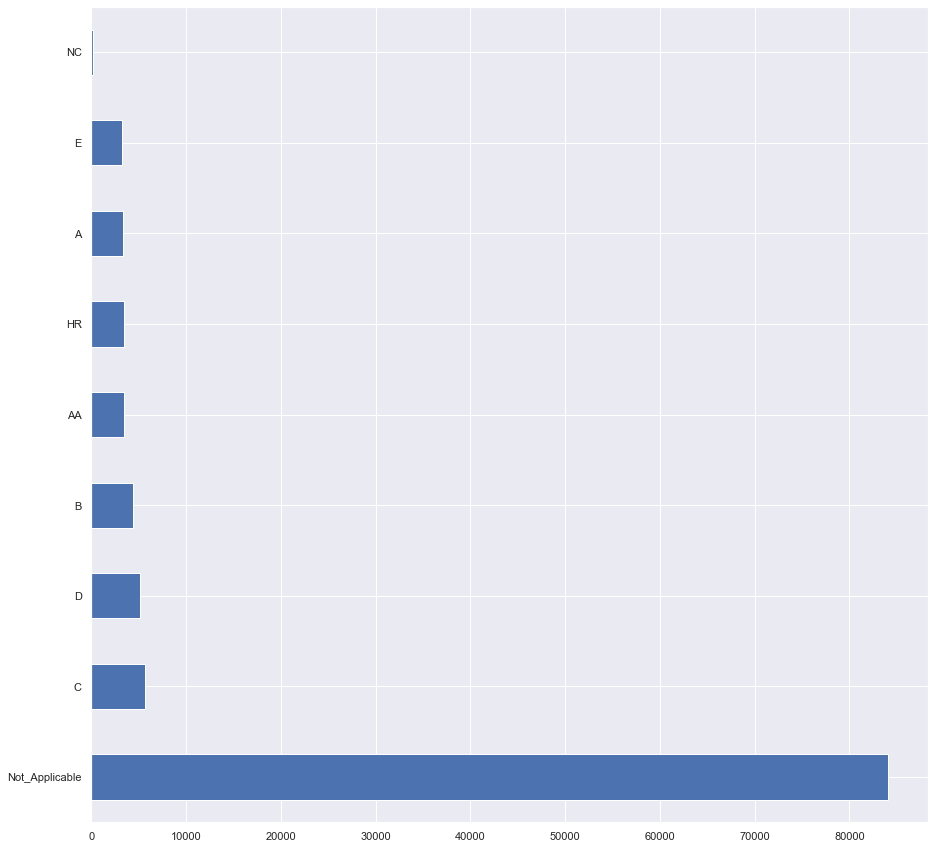

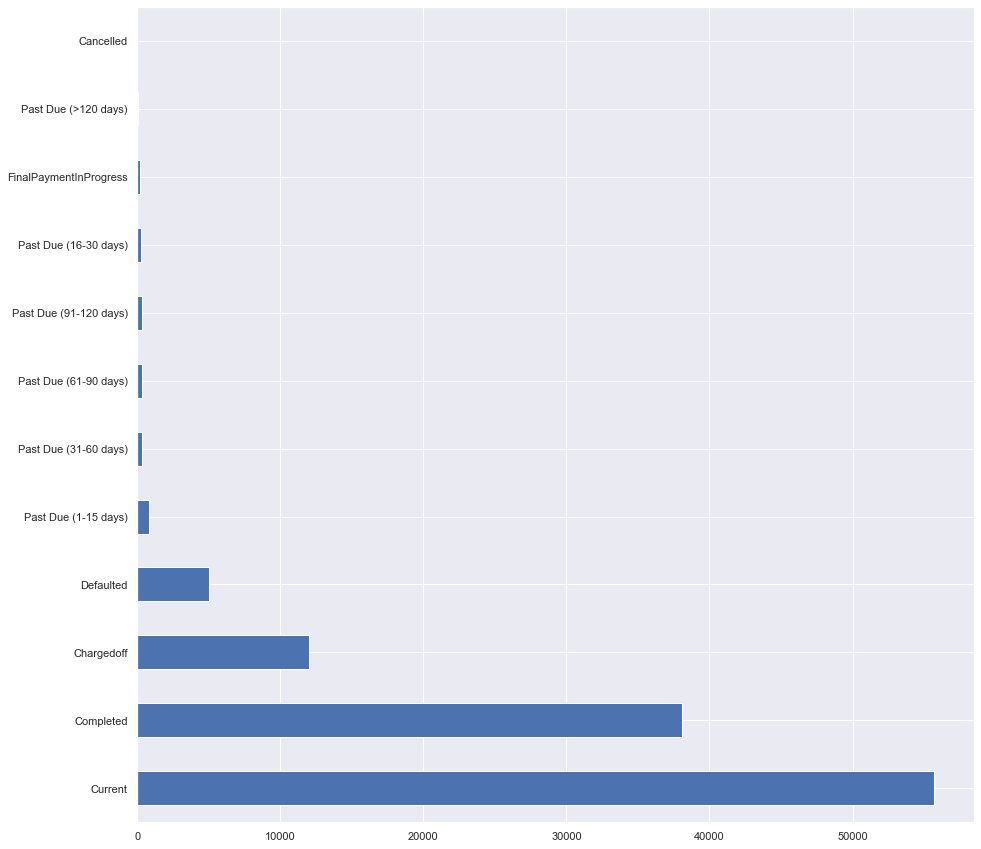

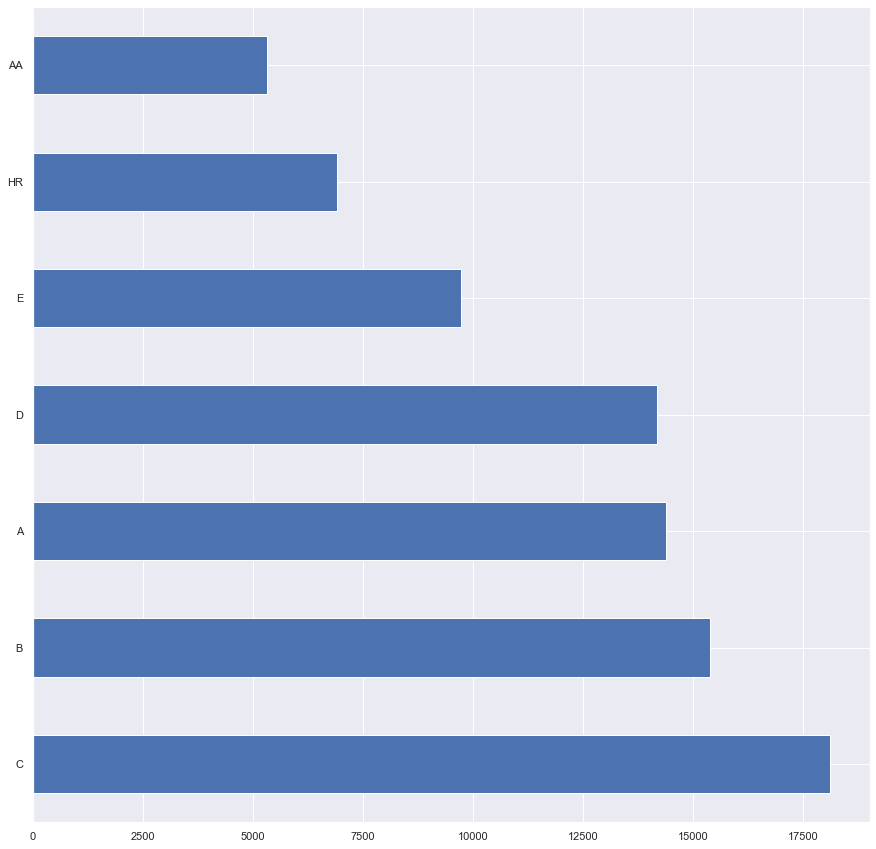

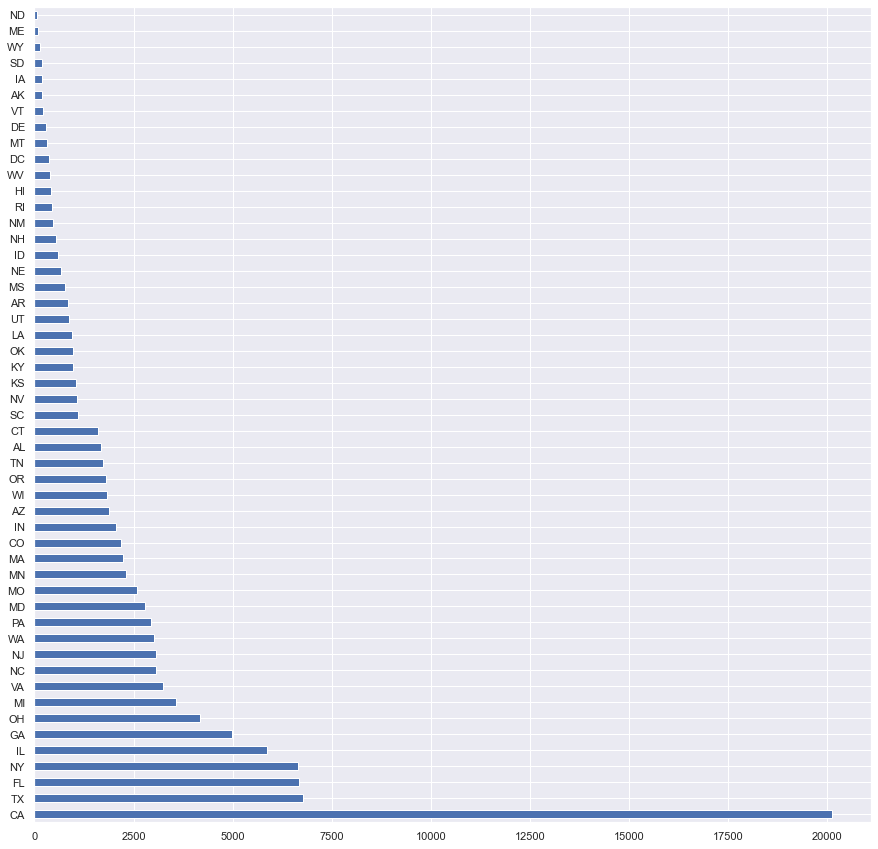

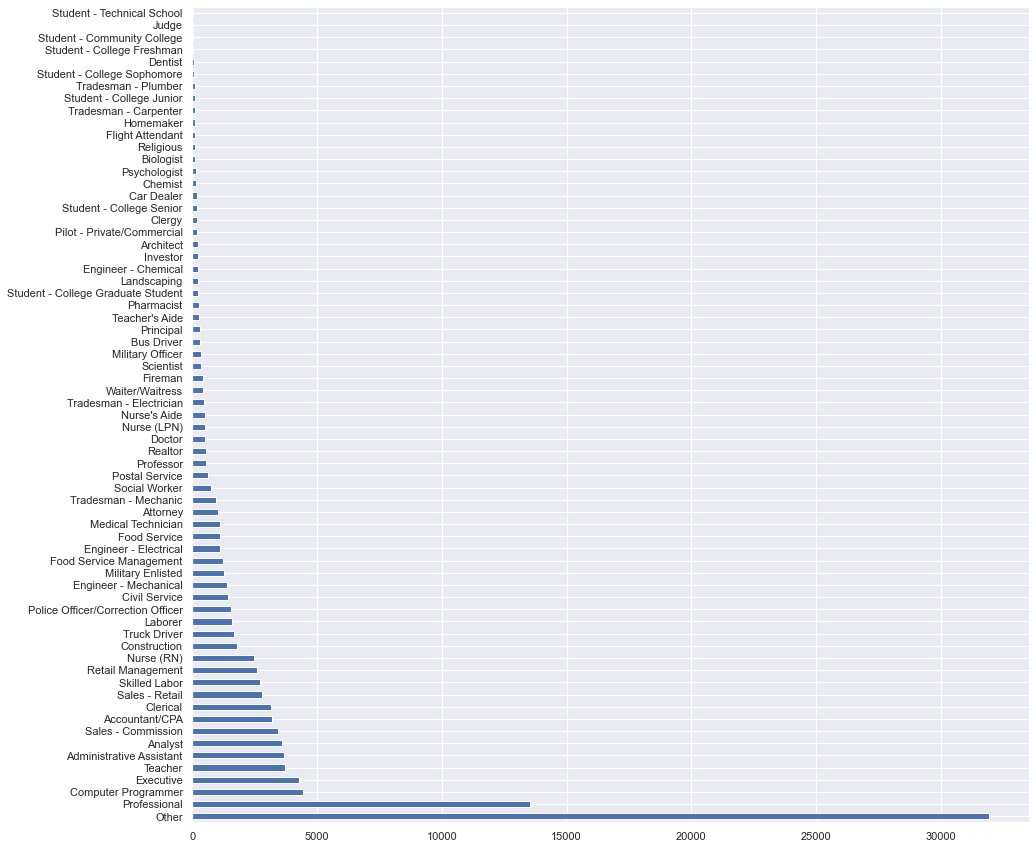

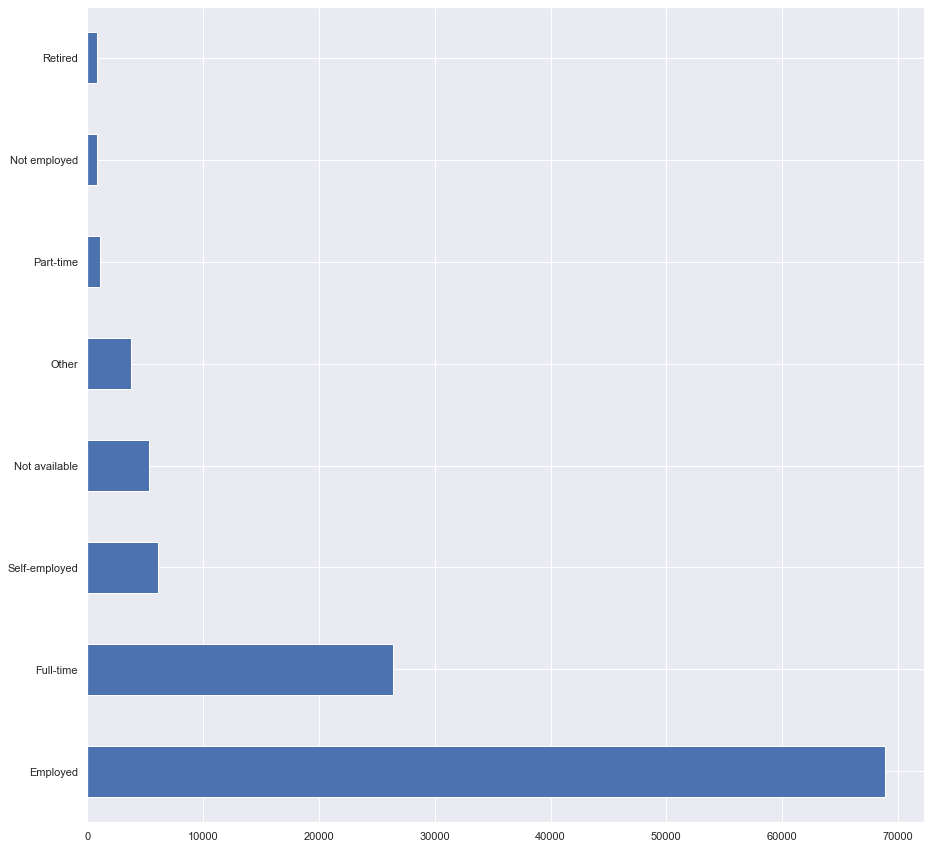

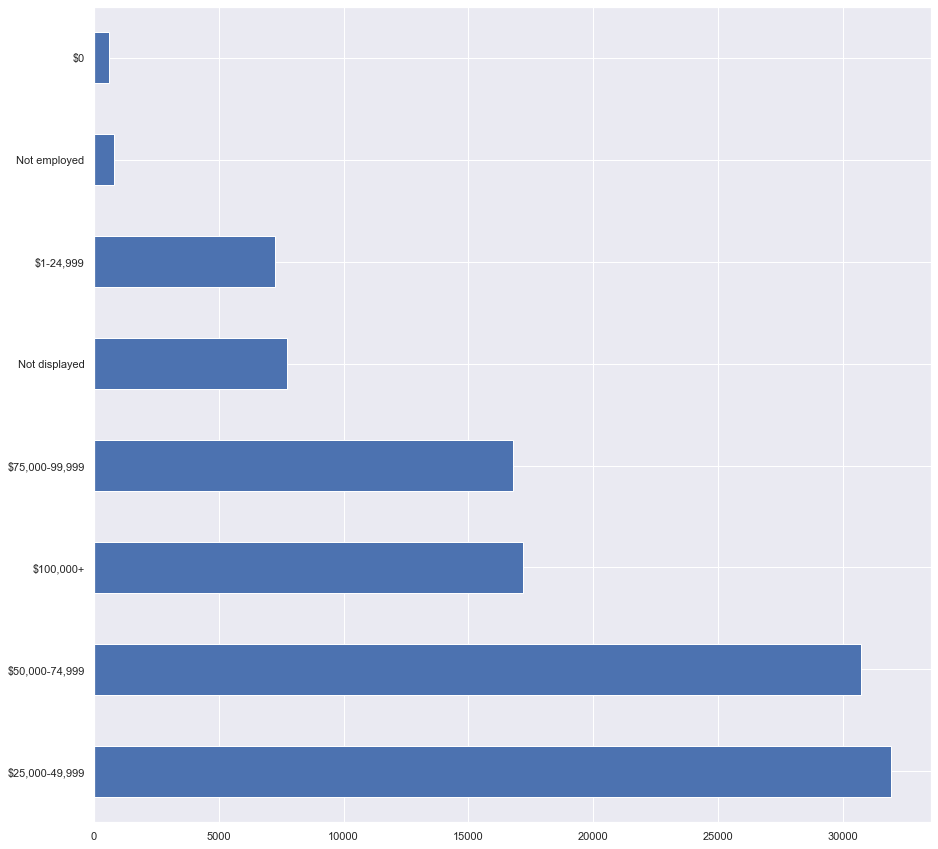

In [199]:
for col in cat_features :
    plt.figure(figsize=(15,15))
    df_loans[col].value_counts().plot(kind = 'barh')
    plt.show()

In [ ]:
for col in bo_features+My_bo_features:
    plt.figure(figsize=(10,10))
    df_loans[col].value_counts().plot(kind = 'barh')
    plt.title(col)
    plt.show()
    print('-------------------------------------------------------------------------------------------------------')

In [ ]:
df_loans['IsLate'][df_loans['IsLate'] != 0]

In [ ]:
plt.figure(figsize=(10,10))
df_loans['IsLate'][df_loans['IsLate'] != 0].value_counts().plot(kind = 'barh')
plt.title('IsLate')
plt.show()

In [ ]:
for col in con_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(df_loans[col])
    plt.title(col)
    plt.show()
    print('-------------------------------------------------------------------------------------------------------')

In [ ]:
for col in dis_features:
    print(col)
    print(df_loans[col].nunique())
    print('-------------------------------------------------------------------------------------------------------')

In [ ]:
df_loans.info()

In [ ]:
con_features

In [ ]:
sub_con_features = ['BorrowerAPR',
 'BorrowerRate',
 'LenderYield',
 'EstimatedEffectiveYield',
 'EstimatedLoss',
 'EstimatedReturn',
 'ProsperRating (numeric)',
 'ProsperScore',
 'EmploymentStatusDuration',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'CurrentCreditLines',
 'OpenCreditLines',
 'TotalCreditLinespast7years',
 'BankcardUtilization',
 'TotalTrades',
 'TradesNeverDelinquent (percentage)',
 'TradesOpenedLast6Months',
 'TotalProsperLoans',
 'TotalProsperPaymentsBilled',
 'OnTimeProsperPayments',
  'ProsperPrincipalBorrowed',
 'ProsperPrincipalOutstanding',
 'ScorexChangeAtTimeOfListing',
 'LoanFirstDefaultedCycleNumber',
 'MonthlyLoanPayment',
 'LP_CustomerPayments',
 'LP_CustomerPrincipalPayments',
 'LP_InterestandFees',
 'LP_ServiceFees',
  'MinIncome',
 'MaxIncome']

#### from the previous boxplot, I can see that those columns could be more helpful than others

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(30, 20))
sns.heatmap(df_loans[sub_con_features].corr(),  vmax=0.9, linewidths=0.02,
           square=True,
            annot=True,
            cmap='YlGnBu',
            linecolor="black")
plt.title('Correlation')

##### 1) the first 8 columns are strongly correlated to each other

In [ ]:
sub_con_features[0:8]

In [ ]:
sub_con_features[18:21]  # also has a strong correlation

In [ ]:
sub_con_features[-6:-2]  # also has a strong correlation

# ------------------------------------------------------------------------------------------------------

In [ ]:
for col in [ 'LenderYield','EstimatedEffectiveYield','EstimatedLoss','EstimatedReturn','ProsperRating (numeric)','ProsperScore','EmploymentStatusDuration','CreditScoreRangeLower','CreditScoreRangeUpper','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','BankcardUtilization','TotalTrades','TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','TotalProsperLoans','TotalProsperPaymentsBilled','OnTimeProsperPayments','ProsperPrincipalBorrowed','ProsperPrincipalOutstanding','ScorexChangeAtTimeOfListing','LoanFirstDefaultedCycleNumber','MonthlyLoanPayment','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees','LP_ServiceFees']:
    print(col," vs BorrowerRate")
    plt.figure(figsize=(10,10))
    sns.relplot(data=df_loans, x=col, y="BorrowerRate",col="IsBorrowerHomeowner", hue="BorrowerState", style="BorrowerState",kind="scatter")
    plt.show()
    print('---------------------------------------------------------------------------------------------------------------')
    print('---------------------------------------------------------------------------------------------------------------')

#### we can't see anything significant with " BorrowerStatue " as hue

## the following graphs explain everything about 'BorrowerRate' which is some kinda our interest

#### you will have 1302 figures. so DON'T focus on every single one just move through them and I will upload the most informative figures for me.

In [ ]:
for bo in bo_features:
    print(bo," using as col")
    for my_bo in My_bo_features:
        print(my_bo," using as hue")
        for col in con_features + dis_features:
            print(col," vs BorrowerRate")
            plt.figure(figsize=(10,10))
            sns.relplot(data=df_loans, x=col, y="BorrowerRate",col=bo, hue=my_bo, style=my_bo,kind="scatter")
            plt.show()
            print('---------------------------------------------------------------------------------------------------------------')
        print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('***************************************************************************************************************')

# ---------------------------------------------------------------------------------------------------------------